# Data, Data Exploration and Data Understanding

## 1.1 Get the dataset

If you are in Google Colab environment, paste the below command. If you are in your local machine, paste the third command.

Copy and paste the following command into a code block and run it to download the dataset.

```
%%bash
wget --no-check-certificate 'https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true' -O Online_Retail.xlsx
```


OR

You can paste the following command into the cell block:

```
!wget --no-check-certificate 'https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true' -O Online_Retail.xlsx
```


For local machine, paste the following command into terminal to the directory you are working on:

```
curl -L -o "Online Retail.xlsx" "https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true"
```

If you are confused, I will keep the description into the cell block as well.

In [10]:
# For Colab enviroment

!wget --no-check-certificate 'https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true' -O Online_Retail.xlsx

--2025-07-02 16:05:35--  https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dhakalnirajan/ML-Algorithms-Zoo/raw/refs/heads/main/datasets/Online%20Retail.xlsx [following]
--2025-07-02 16:05:35--  https://github.com/dhakalnirajan/ML-Algorithms-Zoo/raw/refs/heads/main/datasets/Online%20Retail.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhakalnirajan/ML-Algorithms-Zoo/refs/heads/main/datasets/Online%20Retail.xlsx [following]
--2025-07-02 16:05:35--  https://raw.githubusercontent.com/dhakalnirajan/ML-Algorithms-Zoo/refs/heads/main/datasets/Online%20Retail.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.

In [11]:
# For Local machine environment, paste the following command into Terminal. Uncomment the command below first.
# curl -L -o "Online Retail.xlsx" "https://github.com/dhakalnirajan/ML-Algorithms-Zoo/blob/main/datasets/Online%20Retail.xlsx?raw=true"

## 1.2 Understanding the Customer

Initially, the customer base is small and easily targetable individually. But as the business grows in size, it will not be possible for the business to have intuition about each and every customer. At such stage, human behavior comes into play. Collectively, we show patterns and behaviors that can be predicted given the individual lies within the distribution. At the stage of large scale business, human judgements about each customer will not work, and we have to rely on data.

For medium and large scale retail store, it is important not only to acquire new customers but also in customer retention. With the data, we can look into the customer's consumption behavior through sales data.

## 1.3 Understanding the Data

The dataset is a log of transaction occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Data Description

Attribute Information:

    InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    Description: Product (item) name. Nominal.
    Quantity: The quantities of each product (item) per transaction. Numeric.
    InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
    UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    Country: Country name. Nominal, the name of the country where each customer resides.


We will see this info below when we start to work with data:

---

## 2.1 Importing the libaries

In [12]:
# Installing Pandas DF handler for CUDA for faster processing

# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# %load_ext cudf.pandas

In [13]:
# This command needs to be run in a cell at the beginning of your notebook. Explicitly importing and installing. After enabled, all the operations done with pandas are automatically performed by GPUs.

# import cudf.pandas
# cudf.pandas.install()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [15]:
%matplotlib inline
warnings.filterwarnings('ignore')

## 2.2 Importing data and getting an overview of data.

In [16]:
try:
  df = pd.read_excel('/content/Online_Retail.xlsx') # Loading the dataset from local Colab Runtime

  print(df.head())
  print(df.info())
except FileNotFoundError:
  print("Error: The file 'Online_Retail.xlsx' was not found. Please make sure the file is downloaded correctly.")
except Exception as e:
  print(f"An error occurred: {e}")

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [17]:
# We have already loaded the dataset into dataframe (df)
print(df.info(), "\n\n")
print("Data Description: \n\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None 


Data Description: 

             Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   

As we can see most of the null values are in customerID and all other columns looks fine. We can drop these null values in customerID columns as we are making customer segmentation and keeping those null values makes no sense.

In [18]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [19]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [20]:
df.shape

(541909, 8)

In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## 2.3 Data Cleaning

In [22]:
# checking for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**We can drop these null values in customerID columns.**

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [26]:
shape = df.shape
print(shape)
print(f"\n\n After removing the null values, we have {shape [0]} rows and {shape [1]} columns in our dataset.")

(406829, 8)


 After removing the null values, we have 406829 rows and 8 columns in our dataset.


In [27]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

# Exploratory Data Analysis

Now we are going to perform **Exploratory Data Analysis**.

In [28]:
# Description Name

Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Description_Name'}, inplace=True)
Description_df.head()

Description_Name  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2070
1            REGENCY CAKESTAND 3 TIER   1905
2             JUMBO BAG RED RETROSPOT   1662
3       ASSORTED COLOUR BIRD ORNAMENT   1418
4                       PARTY BUNTING   1416

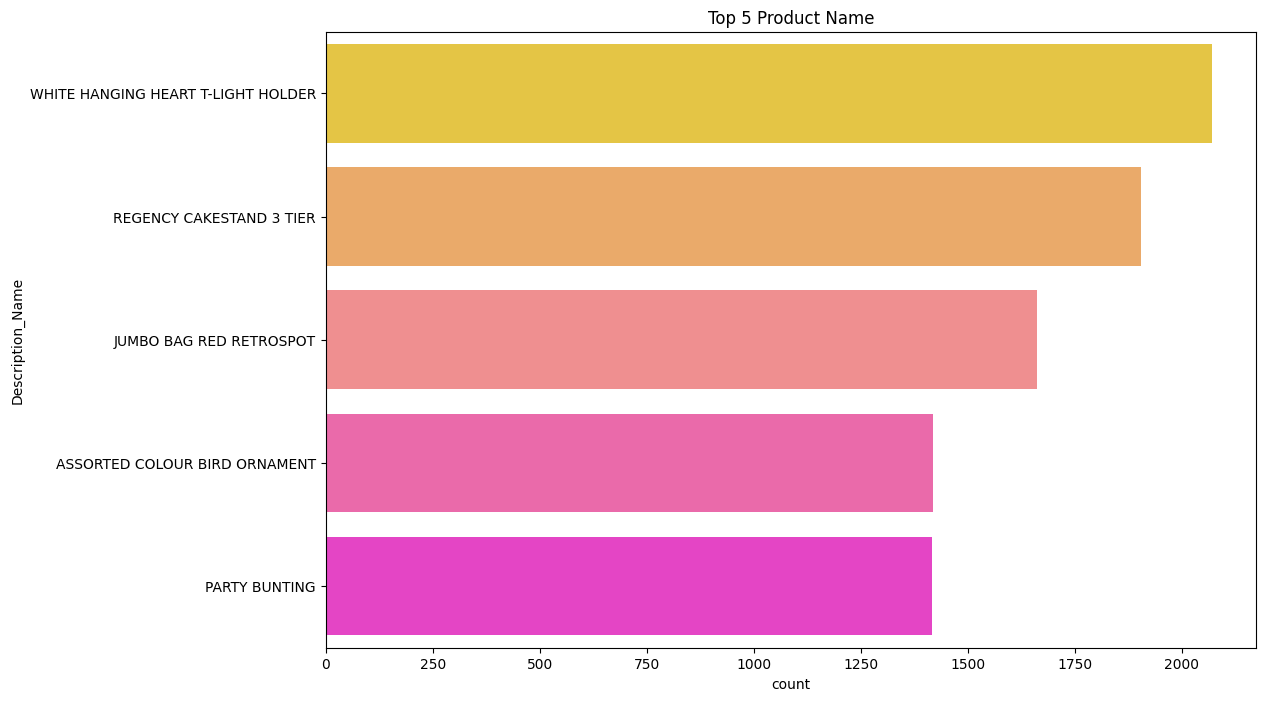

In [29]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='count',y='Description_Name',data=Description_df[:5], palette='spring_r');

**Top products based on maximum selling are:**

1. White Hanging Heart T-Light Holder
2. Regency Cakestand 3 Tier
3. Jumbo Bag Red Retrospot
4. Assorted Color Bird Ornament
5. Party Bunting

In [30]:
Description_df.tail()

Description_Name  count
3891    LIGHT DECORATION BATTERY OPERATED      1
3892            LETTER "Z" BLING KEY RING      1
3893       CROCHET LILAC/RED BEAR KEYRING      1
3894  MIDNIGHT BLUE CRYSTAL DROP EARRINGS      1
3895         WHITE STONE/CRYSTAL EARRINGS      1

**Bottom products based on maximum selling are:**

1. Light Decoration Battery Operated
2. Letter "Z" Bling Key Ring
3. Crochet Lilac/Red Bear Keyring
4. Midnight Blue Crystal Drop Earrings
5. White Stone/Crystal Earrings

In [31]:
# @title StockCode Name

StockCode_df = df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)

StockCode_df.head()

StockCode  count
0    85123A   2077
1     22423   1905
2    85099B   1662
3     84879   1418
4     47566   1416

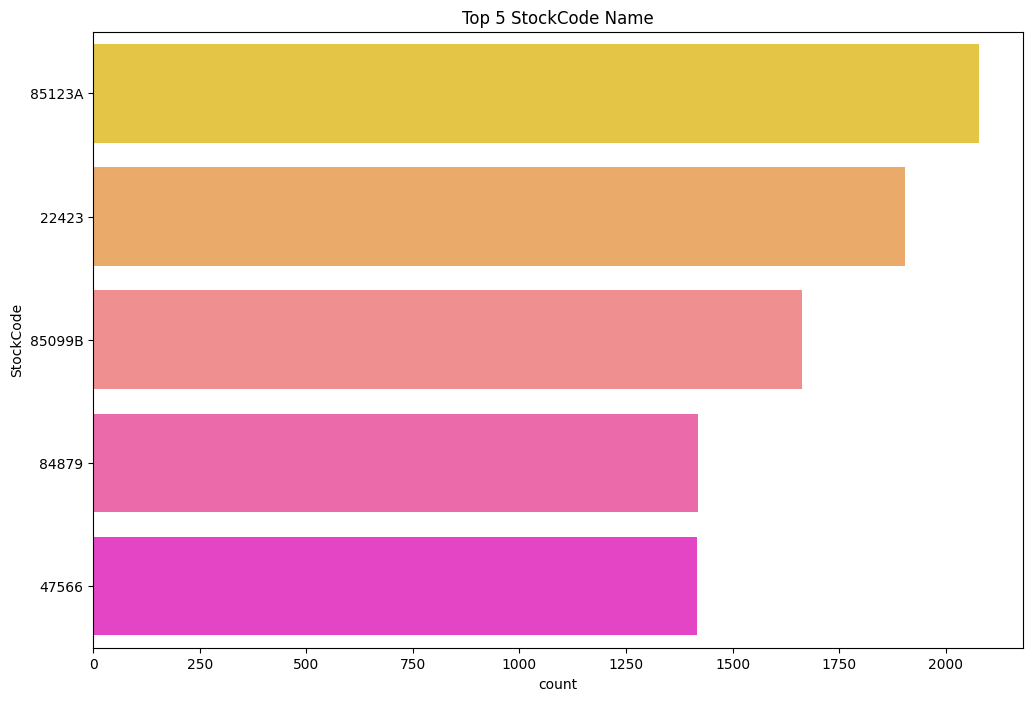

In [32]:
# plot top 5 stockcode name

plt.figure(figsize=(12,8))
plt.title('Top 5 StockCode Name')
sns.barplot(x='count',y='StockCode',data=StockCode_df[:5], palette='spring_r');

In [33]:
# bottom StockCode Name

StockCode_df.tail()

StockCode  count
3679    85023C      1
3680    35597A      1
3681    16169N      1
3682    90065B      1
3683    90162A      1

In [34]:
# @title Country Name

country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)

country_df.head()

Country   count
0  United Kingdom  361878
1         Germany    9495
2          France    8491
3            EIRE    7485
4           Spain    2533

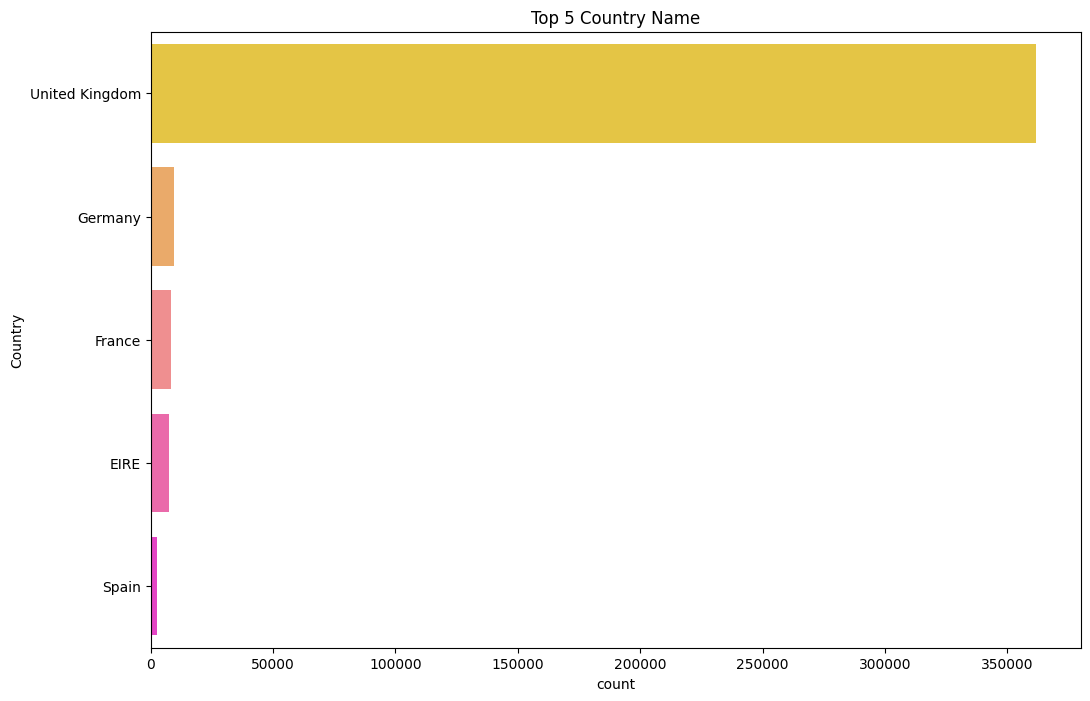

In [35]:
plt.figure(figsize=(12,8))
plt.title('Top 5 Country Name')
sns.barplot(x='count',y='Country',data=country_df[:5], palette='spring_r');

In [36]:
# bottom Countries Name
country_df.tail()

Country  count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     30
35         Bahrain     17
36    Saudi Arabia     10

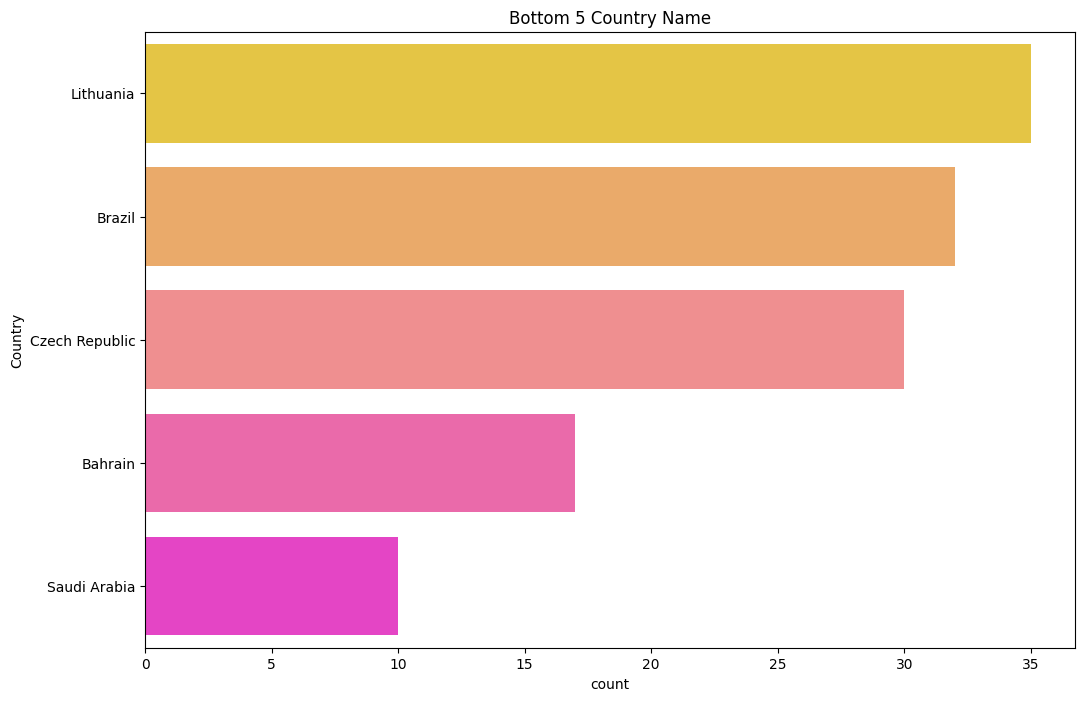

In [37]:
# plotting the bottom 5 countries
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Country Name')
sns.barplot(x='count',y='Country',data=country_df[-5:], palette='spring_r');

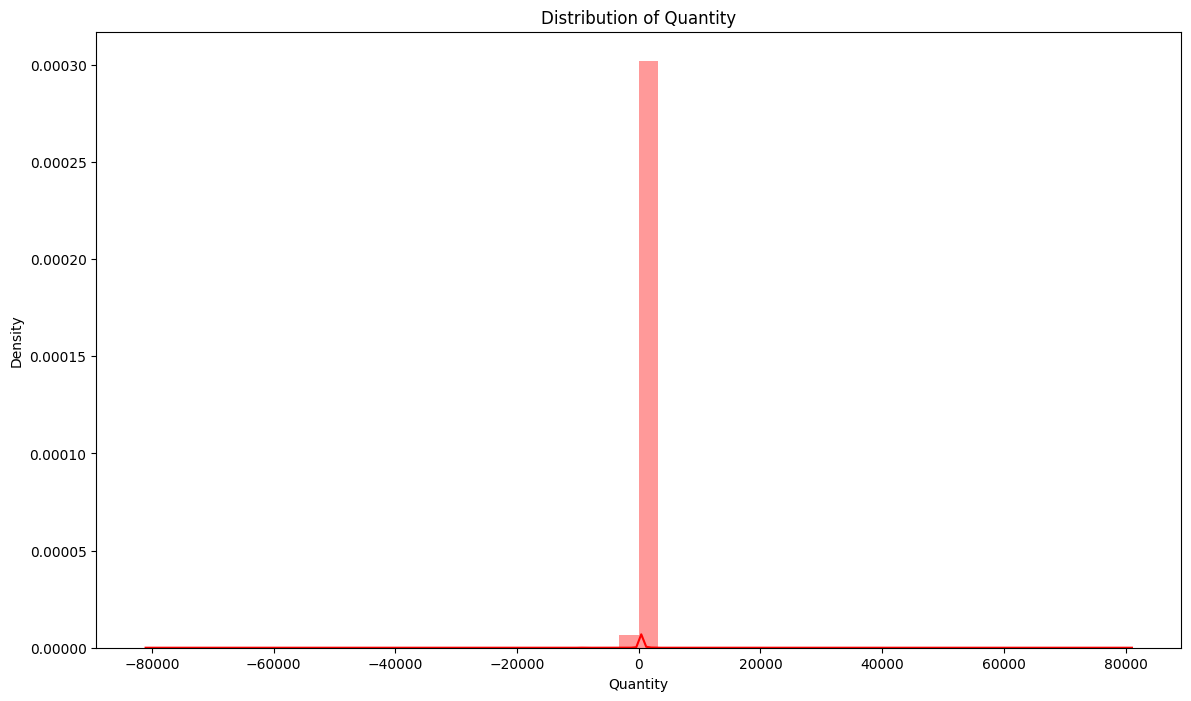

In [38]:
# @title Distribution of Quantity

plt.figure(figsize=(14, 8))
plt.title('Distribution of Quantity')
sns.distplot(df['Quantity'], color="r");

This shows that the distribution of quantity is highly skewed to the right. This means that most of the quantities are concentrated on the left side of the graph, with a long tail extending to the right. In simpler terms, most transactions involve smaller quantities, but there are some transactions with very large quantities that skew the average.

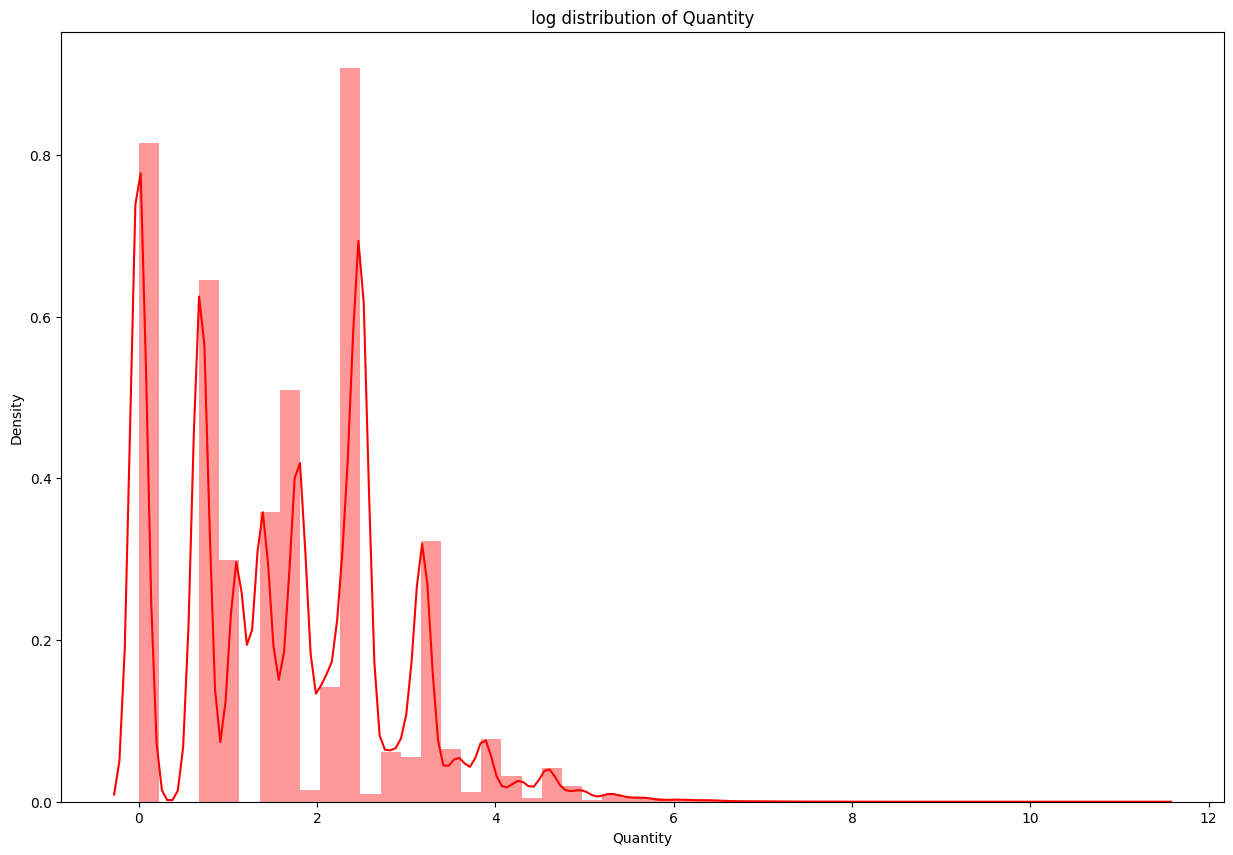

In [39]:
# @title transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

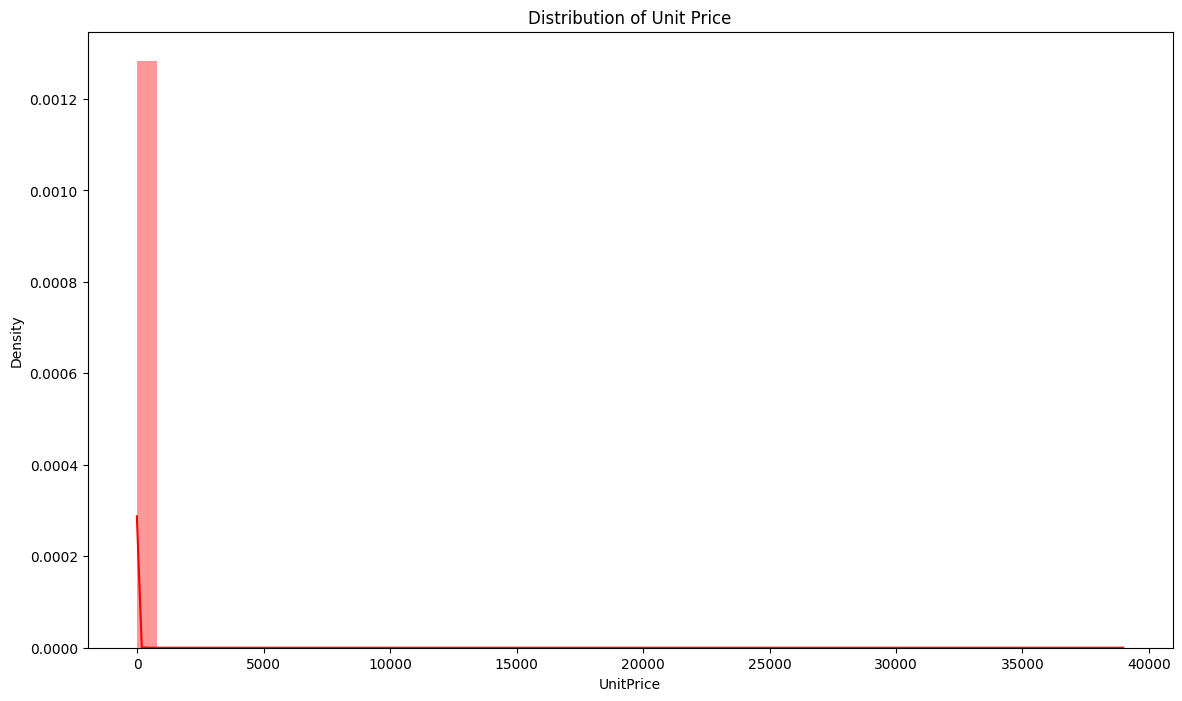

In [40]:
# @title Distribution of Unit Price

plt.figure(figsize=(14, 8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'], color="r");

From the distribution of unit price, we can say that most items have a lower price range.

In [41]:
# checking for unit price less than 0
df[df['UnitPrice']<0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Feature Engineering

In [42]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [43]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [44]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [45]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   

         Day  Hour  TotalAmount  
0  Wednesday     8        15.30  
1  Wednesday     8        20.34  
2  Wednesday     8        22.00  
3  Wednesday     8        20.34  
4  Wednesday     8        20.34

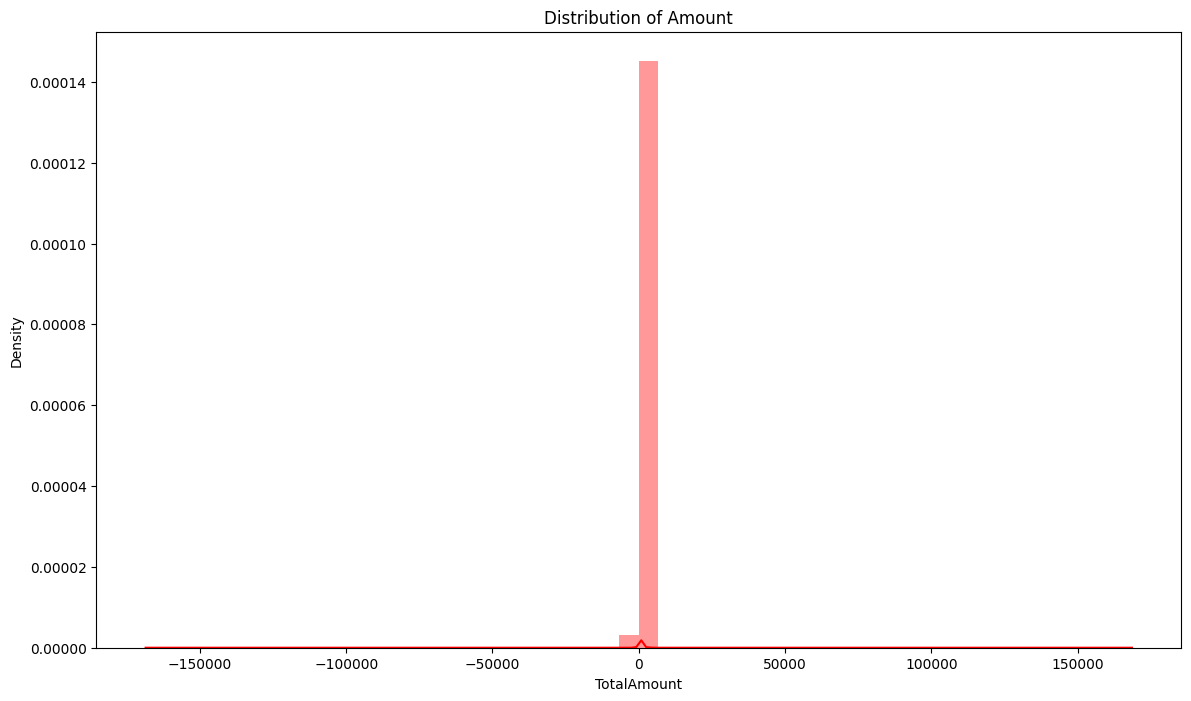

In [46]:
# @title Distribution of Total Amount

# checking distribution for Totalamount

plt.figure(figsize=(14, 8))
plt.title('Distribution of Amount')
sns.distplot(df['TotalAmount'], color="r");

In [47]:
# @title Months

month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)

month_df

Month  count
0    November  65598
1     October  50695
2    December  44511
3   September  40822
4         May  28908
5        June  27836
6       March  27822
7      August  27662
8        July  27502
9       April  23198
10    January  21912
11   February  20363

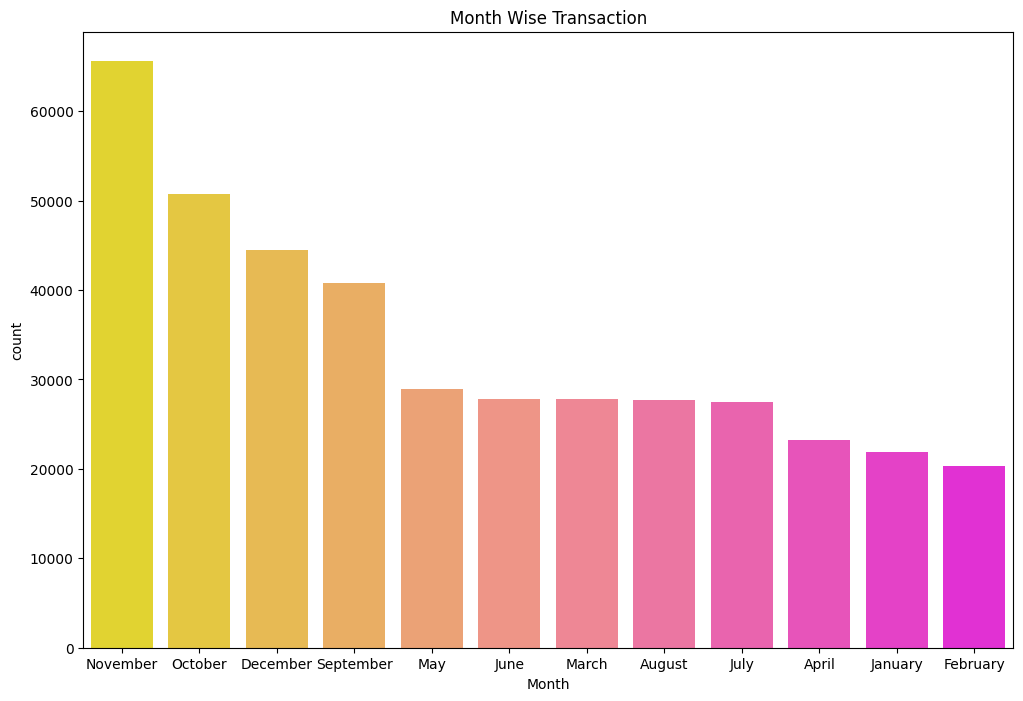

In [48]:
# @title Plotting for Month

plt.figure(figsize=(12,8))
plt.title('Month Wise Transaction')
sns.barplot(x='Month',y='count',data=month_df, palette='spring_r');

Most of the customers have purchased the gifts in the month of November, October and December. The months of November, October, and December exhibit the highest transaction counts. This is likely due to increased gift purchasing during the holiday season, encompassing events such as Thanksgiving, Christmas, and New Year's. Understanding this trend is valuable for customer segmentation, as it suggests a potential segment of 'holiday shoppers' with distinct purchasing behaviors.

In [49]:
# @title Days

day_df = df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)

day_df

Day  count
0   Thursday  82374
1  Wednesday  70599
2    Tuesday  68110
3     Monday  66382
4     Sunday  63237
5     Friday  56127

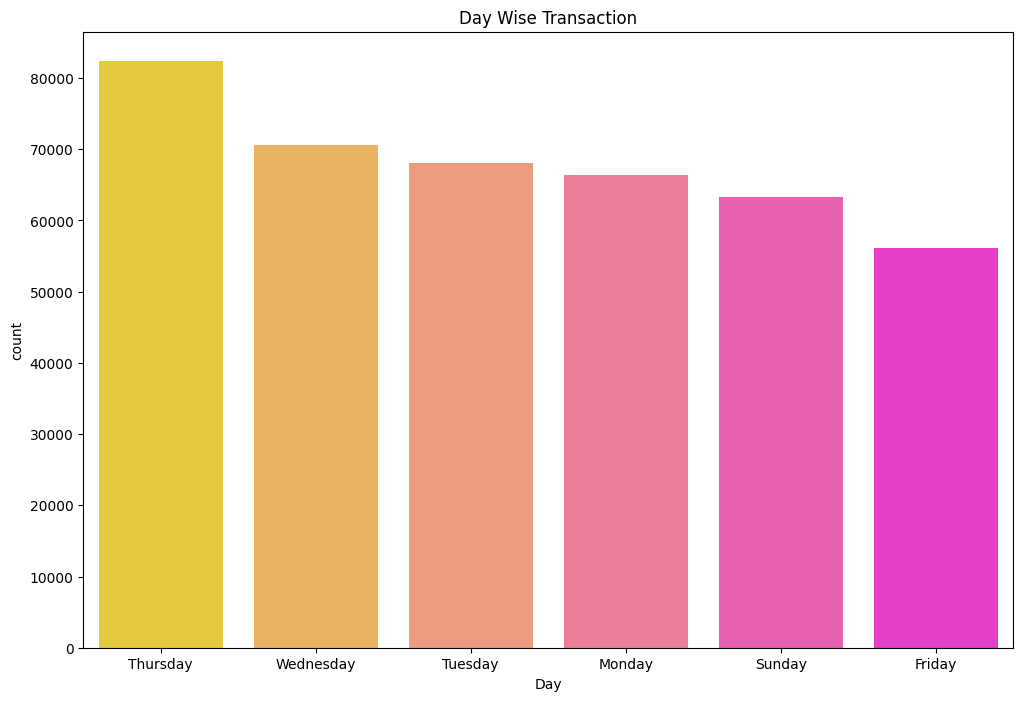

In [50]:
# plotting for Days

plt.figure(figsize=(12,8))
plt.title('Day Wise Transaction')
sns.barplot(x='Day',y='count',data=day_df, palette='spring_r');

We can see maximum number of transactions occur on Thursdays. But I have no idea to account for a missing day--Saturday. Maybe there are no data entries for saturday or there are no transactions on that day.

In [51]:
# @title Hour

hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)

hour_df

Hour  count
0     12  73342
1     13  65062
2     14  55075
3     11  50249
4     15  46220
5     10  38951
6     16  24997
7      9  22464
8     17  13734
9      8   8792
10    19   3511
11    18   3137
12    20    871
13     7    383
14     6     41

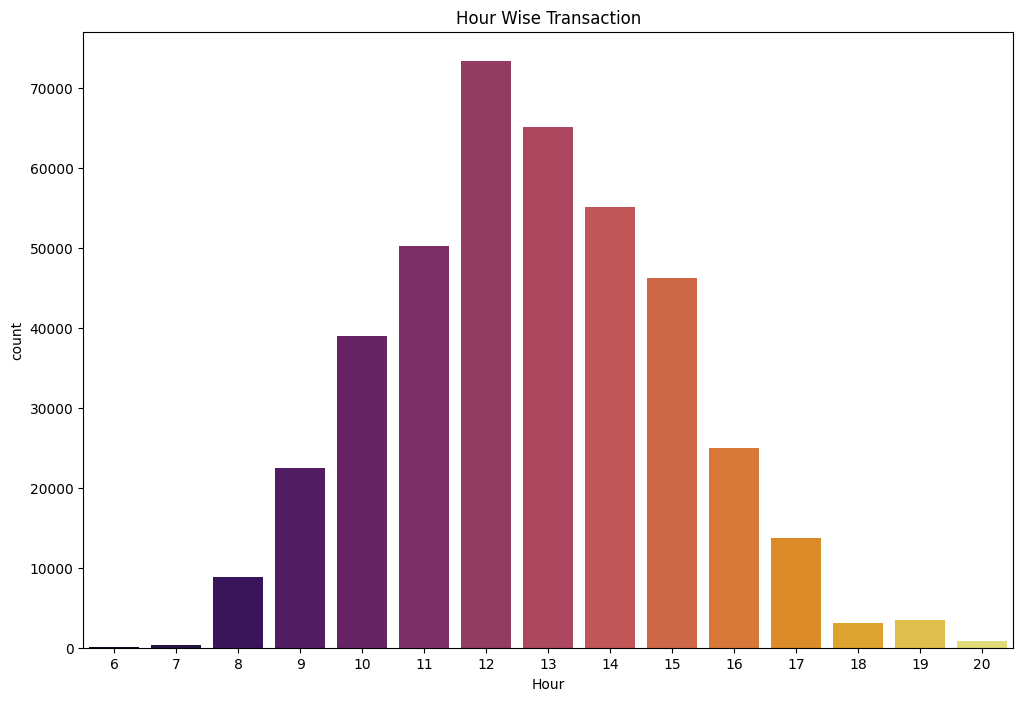

In [52]:
# plotting for hour

plt.figure(figsize=(12,8))
plt.title('Hour Wise Transaction')
sns.barplot(x='Hour',y='count',data=hour_df, palette='inferno');

From the graph above, we can say that most of number of transactions are done between 12 PM and 2 PM.

In [53]:
# @title dividing the hours into morning, afternoon and evening

def time_type(time):
  if(time) >=6 and time <=11:
    return 'Morning'
  elif(time) >=12 and time <=17:
    return 'Afternoon'
  elif(time) >=18 and time <=23:
    return 'Evening'
  else:
    return 'Night'

In [54]:
# applying function we created on hour column

df['Time_Type']=df['Hour'].apply(time_type)

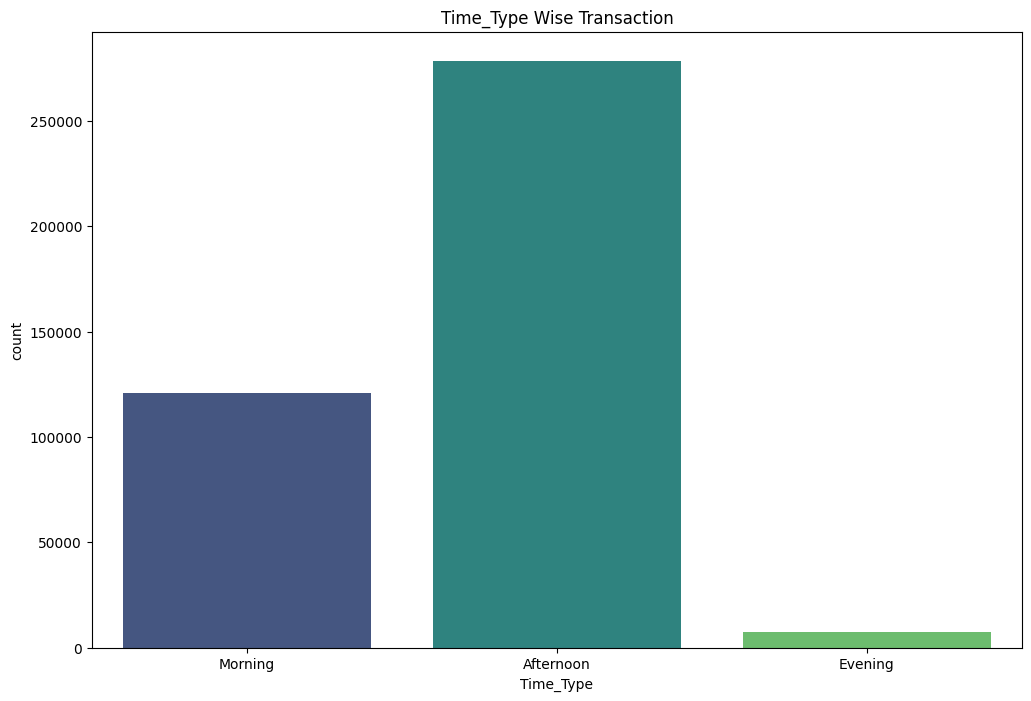

In [55]:
# @title plotting for time type

plt.figure(figsize=(12,8))
plt.title('Time_Type Wise Transaction')
sns.countplot(x='Time_Type',data=df, palette='viridis');

Most of the customers have purchased the items during afternoon. Moderate number of transactions happened during morning and least number of customers during evening.

# Creating RFM Model (Recency, Frequency, Monetary Value) Model

RFM is a method used for analyzing customer value. It is commonly used in direct marketing and has received particular attention in retail and professional service industries.

**RFM** Stands for three dimensions:

**Recency**: How recently did the customer make purchase?

**Frequency**: How often do they purchase?

**Monetary**: How much do they spend?

<br>

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.


In [56]:
# Recency = Latest Date - Last Invoice Date, Frequency = Count of invoice no. of transaction(s), Monetary = Sum of Total Amount for each customer

import datetime as dt

In [57]:
# Set Latest Date to 2011-12-10 as last invoice date was 2011-12-09. This is done to calculate the number of days from recent purchase.
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modeling scores for each customer. Grouping the data by 'CustomerID' and then aggregating 'InvoiceDate', 'InvoiceNo', and 'TotalAmount' to calculate recency, frequency, and monetary value
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency, and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      0.00
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          18         73   1757.55
12350.0         310         17    334.40

In [58]:
# Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4372.000000
mean       91.581199
std       100.772139
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

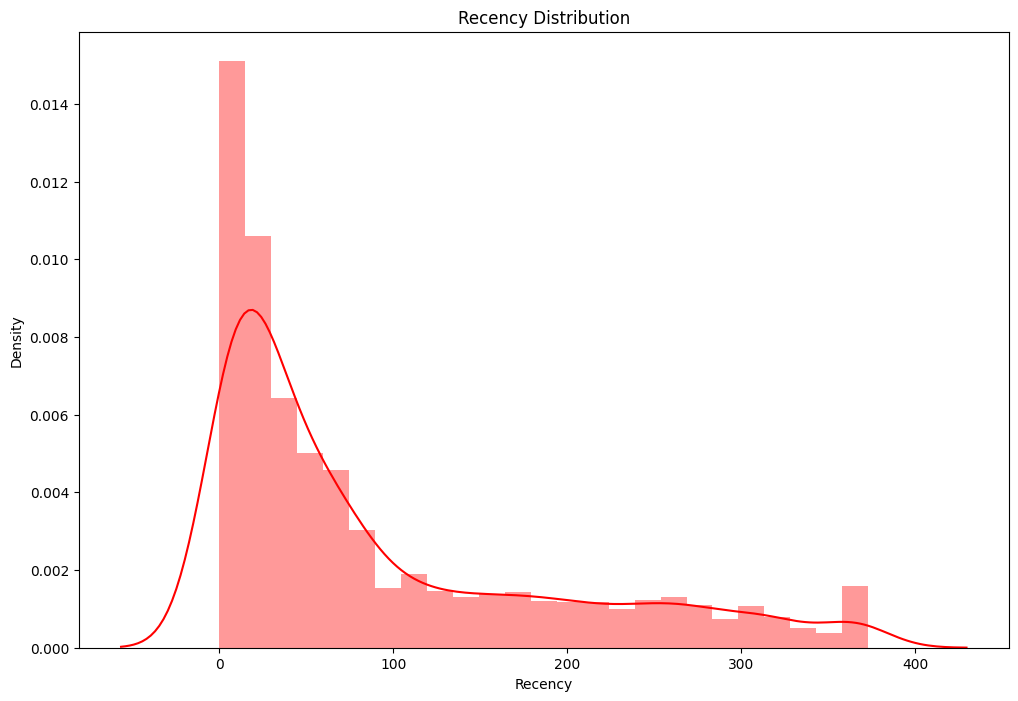

In [59]:
# Recency Distribution Plot
plt.figure(figsize=(12,8))
plt.title('Recency Distribution')
sns.distplot(rfm_df['Recency'], color="r");

In [60]:
# Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

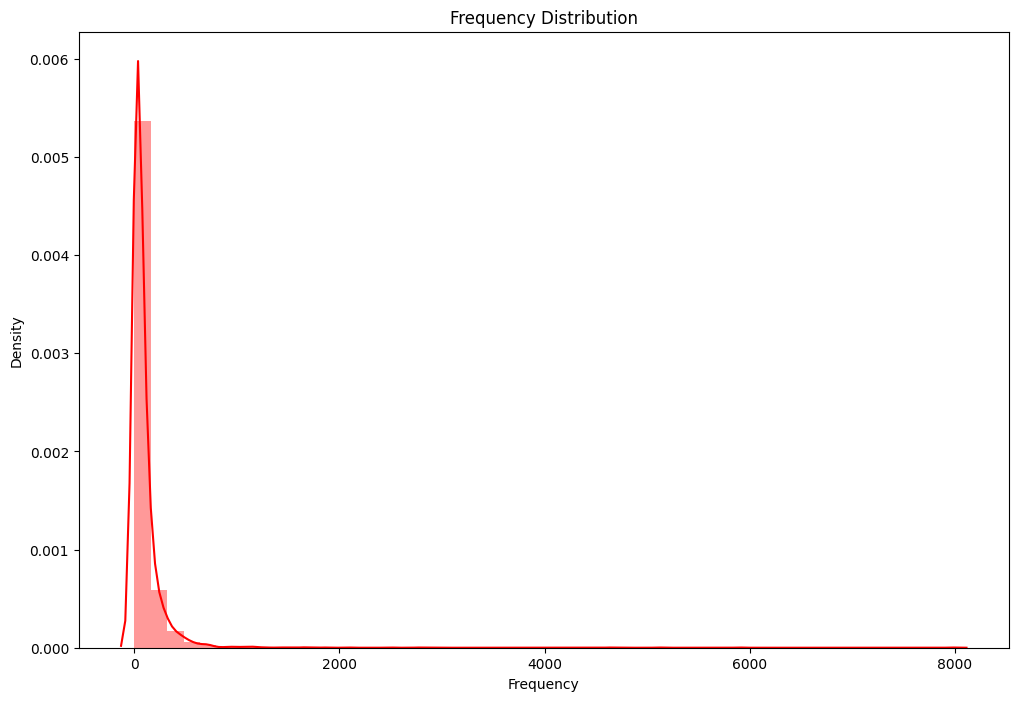

In [61]:
# Frequency Distribution Plot
plt.figure(figsize=(12,8))
plt.title('Frequency Distribution')
sns.distplot(rfm_df['Frequency'], color="r");

In [62]:
# Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Monetary, dtype: float64

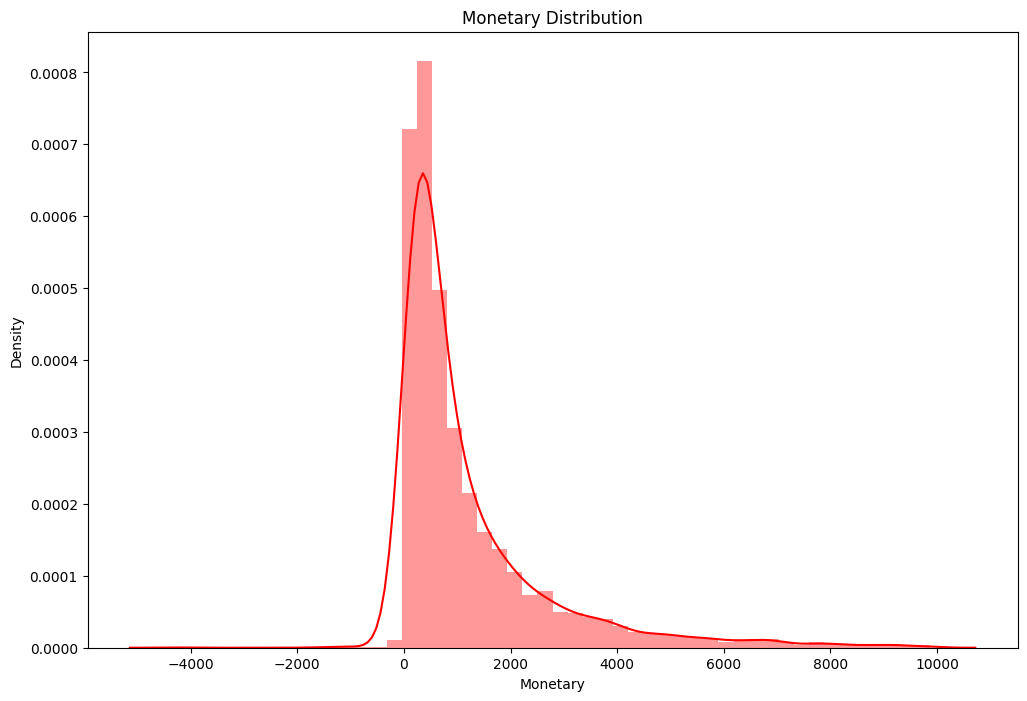

In [63]:
# Monetary Distribution Plot, taking observations which have monetary value less than 10000
x = rfm_df[rfm_df['Monetary']<10000]
plt.figure(figsize=(12,8))
plt.title('Monetary Distribution')
sns.distplot(x['Monetary'], color="r");

From the above RFM graph plots, we can say that the data is positively skewed distribution.

## Split into four segments using quantiles

In [64]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [65]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 293.3625, 0.5: 648.0750000000002, 0.75: 1611.725}}

In [66]:
# Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
# We create two functions to create scores

def RScoring(x, p, d):
    """
    Returns a score based on the input value x, quantile p, and dictionary d.

    The score is determined by the position of x in the quantile p of dictionary d.
    The quantile p is divided into four equal parts, and the score is assigned as follows:
    - 1: x is in the lowest 25% of the quantile
    - 2: x is in the middle 50% of the quantile
    - 3: x is in the upper 25% of the quantile
    - 4: x is in the upper 75% of the quantile

    Args:
        x (float): The input value to be scored
        p (float): The quantile to use for scoring
        d (dict): The dictionary containing the quantiles

    Returns:
        int: The score assigned to the input value x
    """
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


def FnMScoring(x, p, d):
    """
    Returns a score based on the input value x, quantile p, and dictionary d.

    The score is determined by the position of x in the quantile p of dictionary d.
    The quantile p is divided into four equal parts, and the score is assigned as follows:
    - 1: x is in the upper 75% of the quantile
    - 2: x is in the upper 50% of the quantile
    - 3: x is in the middle 25% of the quantile
    - 4: x is in the lowest 25% of the quantile

    Args:
        x (float): The input value to be scored
        p (float): The quantile to use for scoring
        d (dict): The dictionary containing the quantiles

    Returns:
        int: The score assigned to the input value x
    """
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [67]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency', quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency', quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary', quantiles,))

rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          2      0.00  4  4  4
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [68]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          2      0.00  4  4  4      444        12
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [69]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

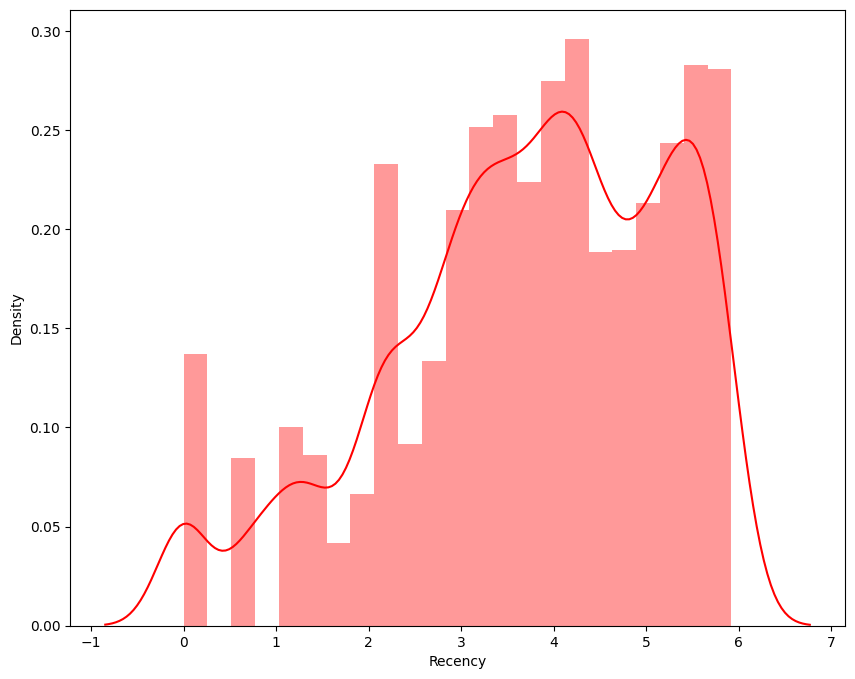

In [70]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

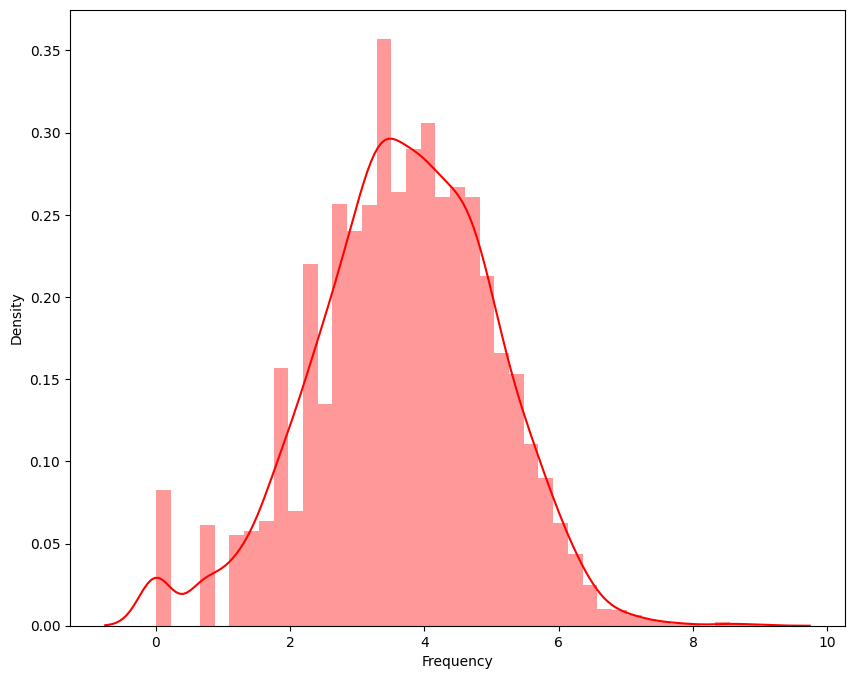

In [71]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

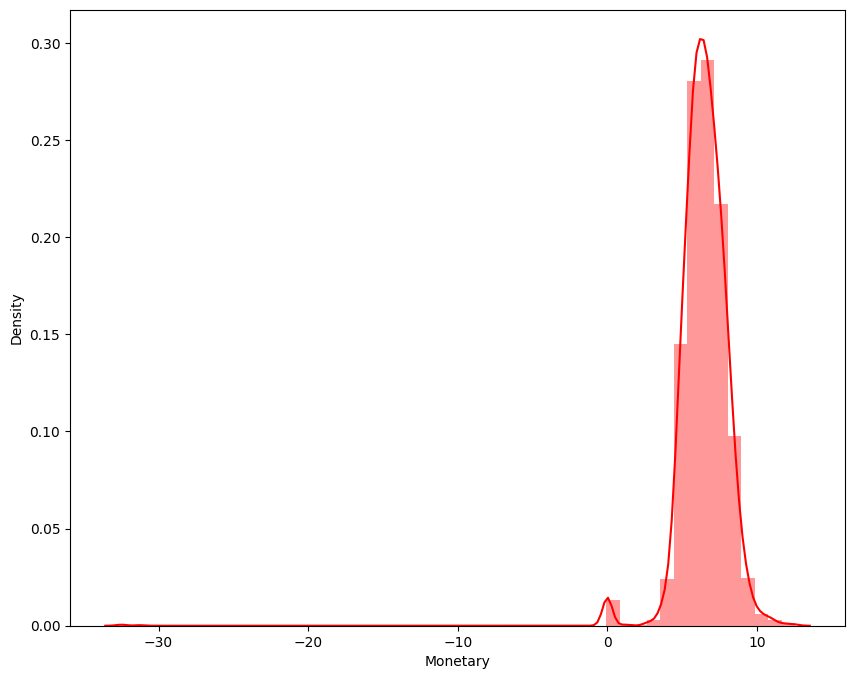

In [72]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

In [73]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(np.log)

# Clustering

## K-Means Clustering


Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

**Silhouette Score Method:**

Silhouette score is used to evaluate the quality of the clusters created using clustering algorithms such as K-Means in terms of how well the samples are clustered with other samples that are similar to each other. The silhouette score is calculated for each sample of different clusters.

In [75]:
# @title Applying Silhouette Score Method on Recency and Monetary

#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4243602765126042
For n_clusters = 3, silhouette score is 0.44458944516557686
For n_clusters = 4, silhouette score is 0.3624772807008105
For n_clusters = 5, silhouette score is 0.37645062543259067
For n_clusters = 6, silhouette score is 0.3839690549097425
For n_clusters = 7, silhouette score is 0.3734103211230609
For n_clusters = 8, silhouette score is 0.3705104176476937
For n_clusters = 9, silhouette score is 0.3549940434384494
For n_clusters = 10, silhouette score is 0.34461066381644995
For n_clusters = 11, silhouette score is 0.3475523274315784
For n_clusters = 12, silhouette score is 0.3477550655230791
For n_clusters = 13, silhouette score is 0.3471311388275168
For n_clusters = 14, silhouette score is 0.3406998122279332
For n_clusters = 15, silhouette score is 0.3470436467543779


## Elbow Method:

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

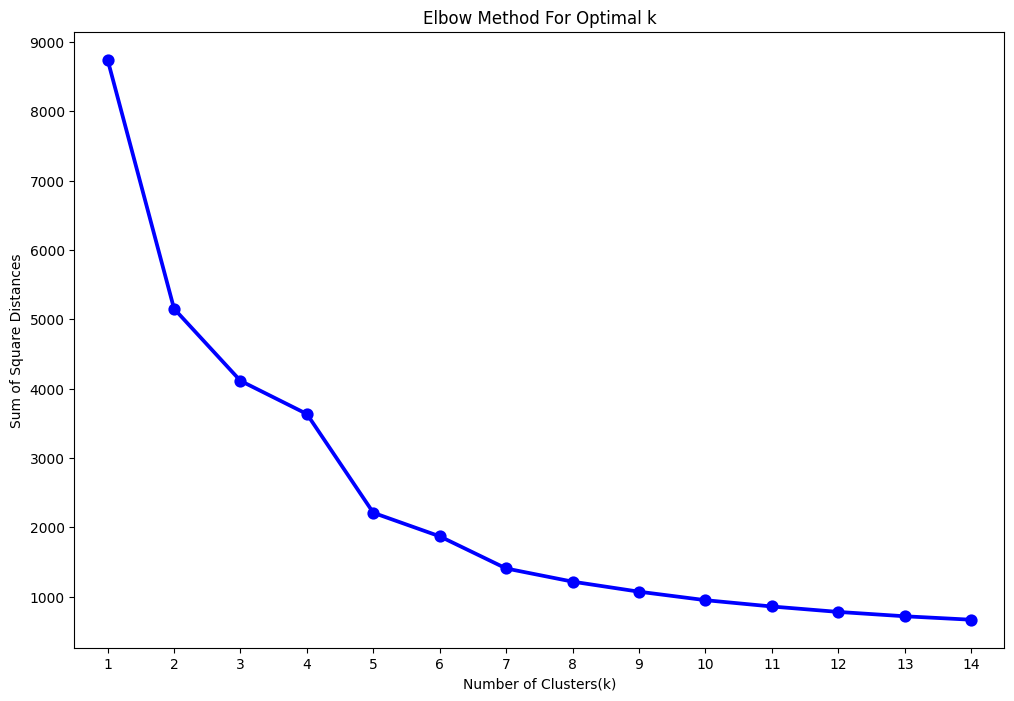

In [76]:
# @title Applying Elbow Method on Recency and Monetary

features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='b')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

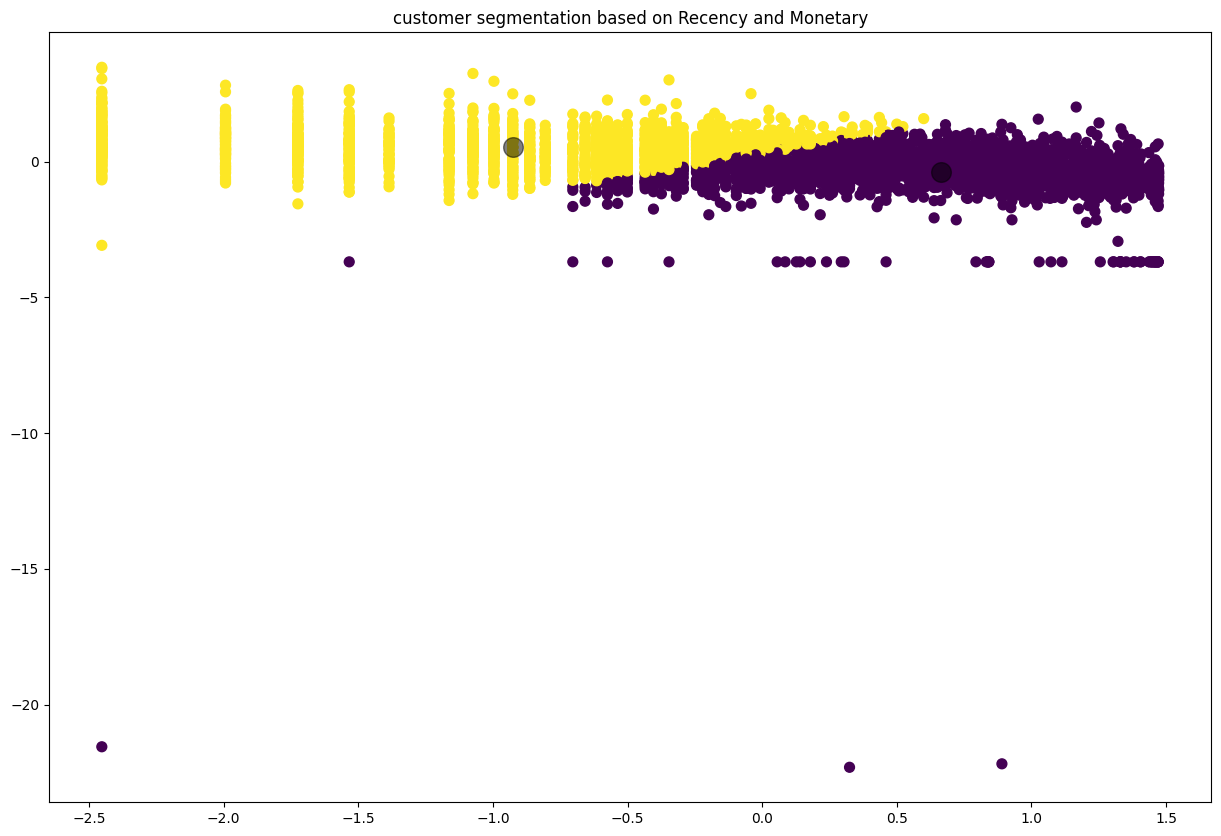

In [78]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

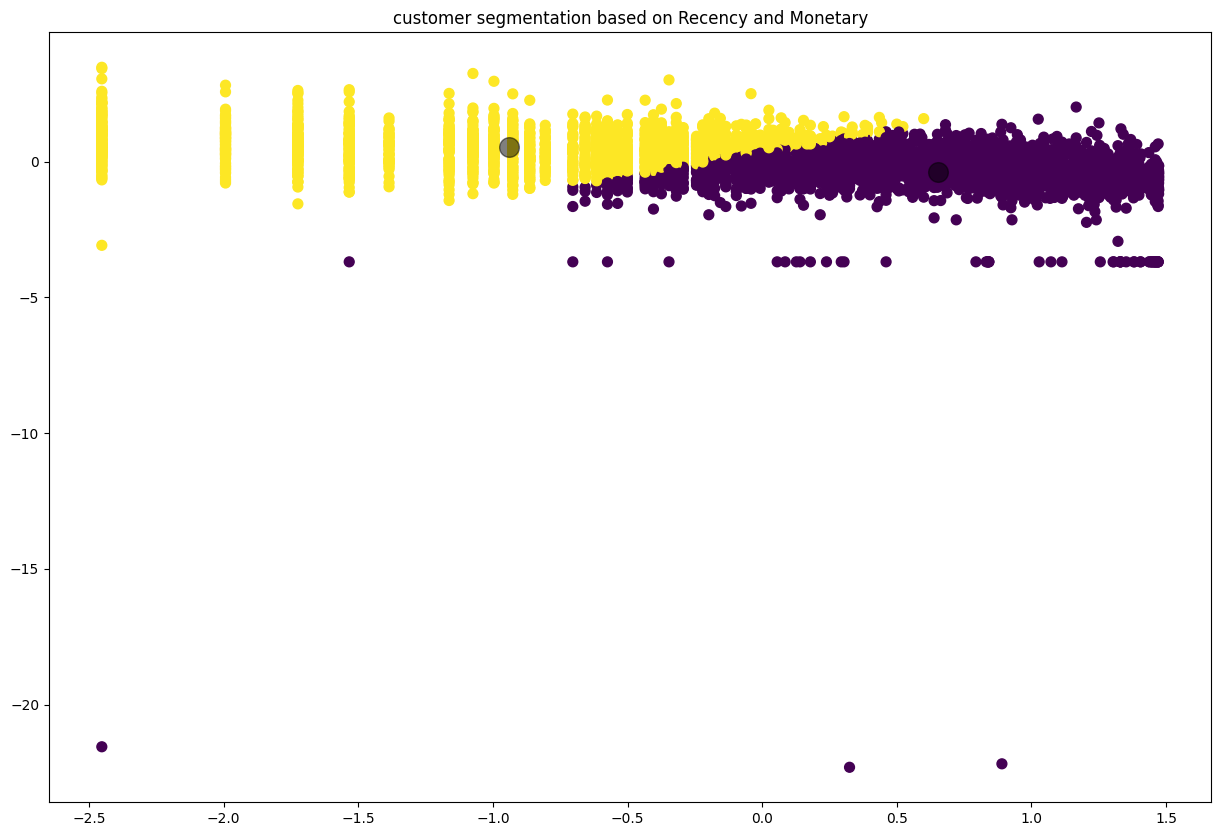

In [79]:
kmeans_4 = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.

## DBSCAN Clustering

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

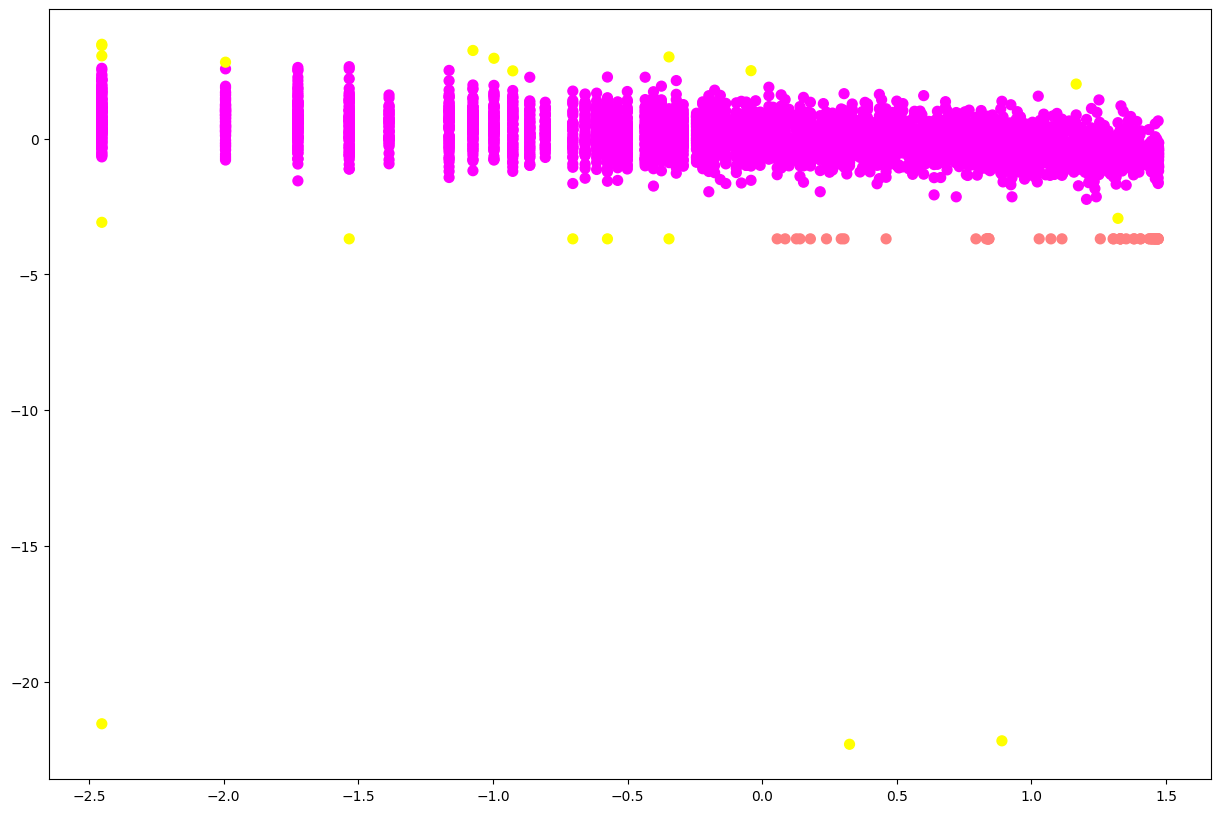

In [80]:
# @title Applying DBSCAN on Recency and Monetary

from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='spring_r')

In [81]:
# @title Applying silhouette Score Method on Frquency and Monetary

features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4691391296667945
For n_clusters = 3, silhouette score is 0.42271086056623947
For n_clusters = 4, silhouette score is 0.42153911482073
For n_clusters = 5, silhouette score is 0.3863087540308829
For n_clusters = 6, silhouette score is 0.387011046427115
For n_clusters = 7, silhouette score is 0.3603277179865907
For n_clusters = 8, silhouette score is 0.3405366101872762
For n_clusters = 9, silhouette score is 0.35407902171707173
For n_clusters = 10, silhouette score is 0.32595774614000844
For n_clusters = 11, silhouette score is 0.3492380353746167
For n_clusters = 12, silhouette score is 0.3444416350115005
For n_clusters = 13, silhouette score is 0.34399593983597965
For n_clusters = 14, silhouette score is 0.34905954344399426
For n_clusters = 15, silhouette score is 0.3628229770663095


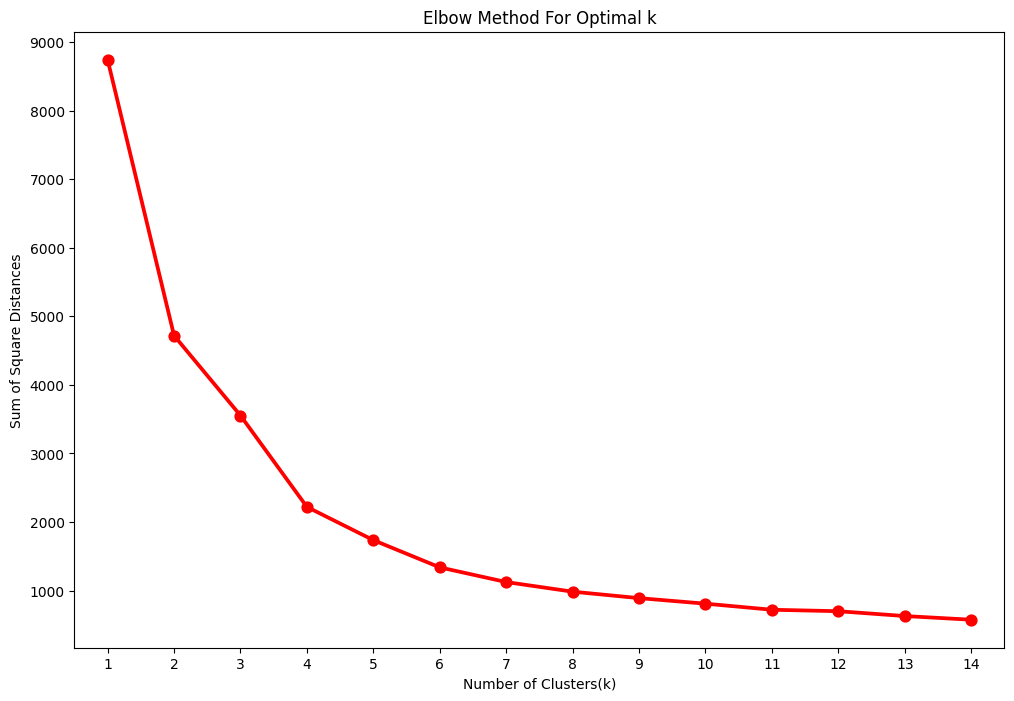

In [82]:
# @title Applying Elbow Method on Frequency and Monetary

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [83]:
kmeans_n2 = KMeans(n_clusters=2)
kmeans_n2.fit(X)
y_kmeans= kmeans_n2.predict(X)

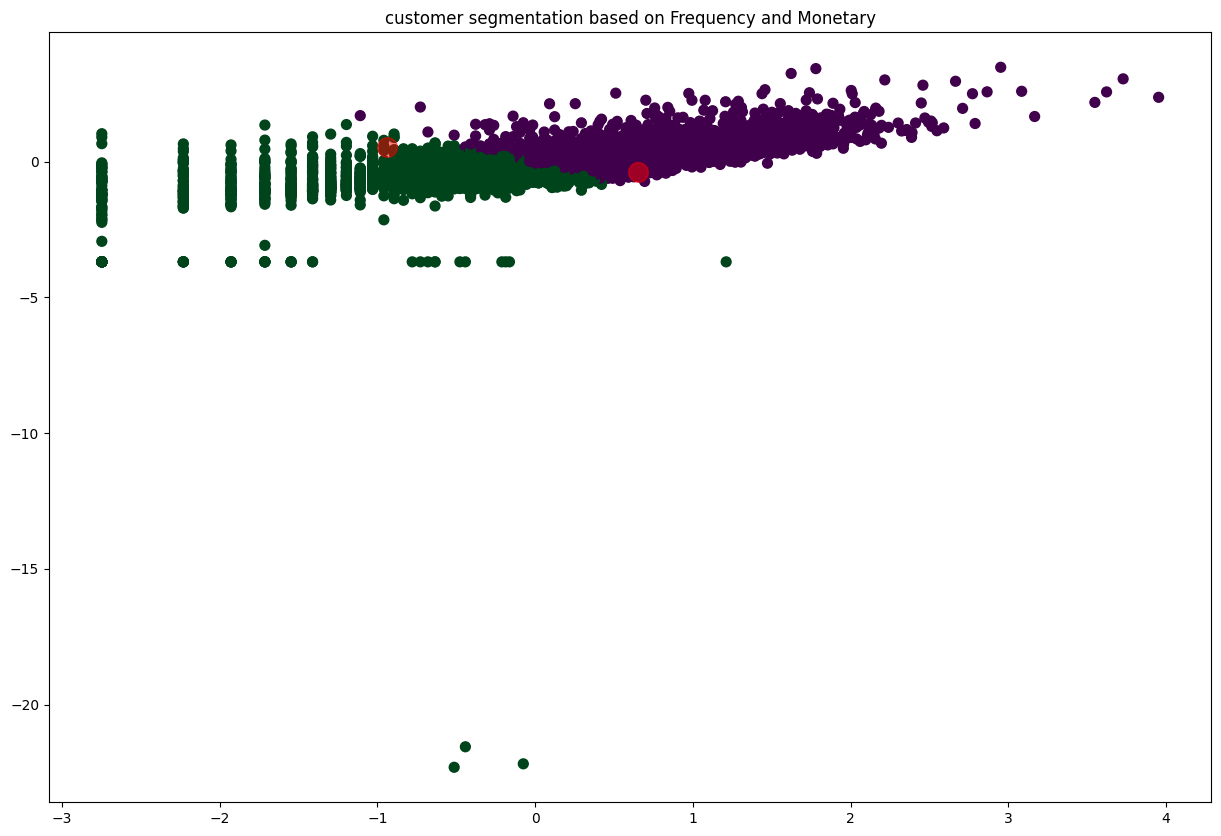

In [84]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Customers are separated when we cluster them by Frequency and Monetary.

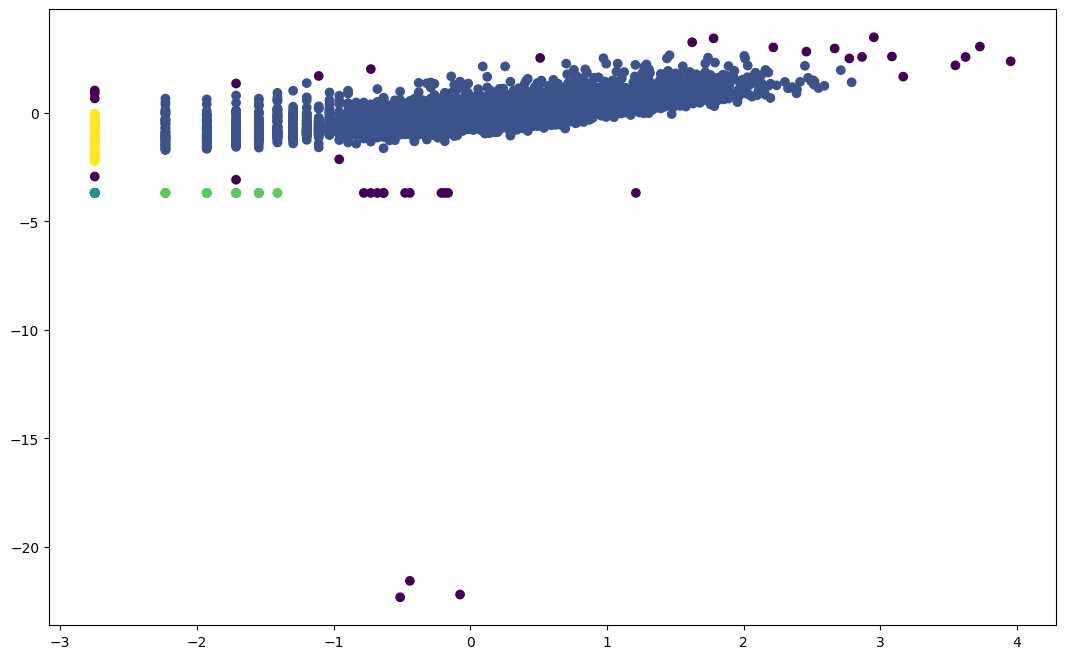

In [85]:
# @title Applying DBSCAN to Method on Frquency and Monetary

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

In [86]:
# @title Applying Silhouette Method on Recency, Frequency and Monetary

#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [87]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.3874174812009768
For n_clusters = 3 The average silhouette_score is : 0.39099274992619015
For n_clusters = 4 The average silhouette_score is : 0.3018065881041828
For n_clusters = 5 The average silhouette_score is : 0.2631367986307682
For n_clusters = 6 The average silhouette_score is : 0.2920487877767128
For n_clusters = 7 The average silhouette_score is : 0.2890250017828385
For n_clusters = 8 The average silhouette_score is : 0.2924076615619997
For n_clusters = 9 The average silhouette_score is : 0.2773264259119815
For n_clusters = 10 The average silhouette_score is : 0.2784399717111983


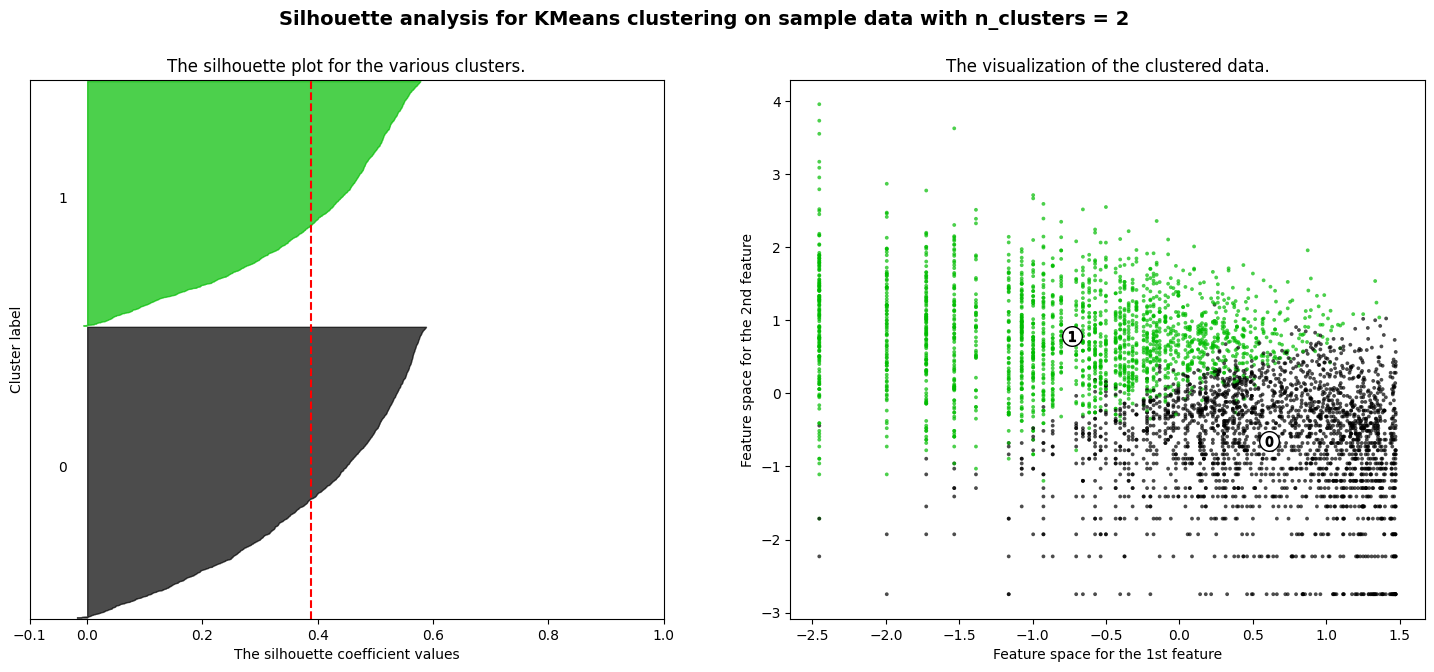

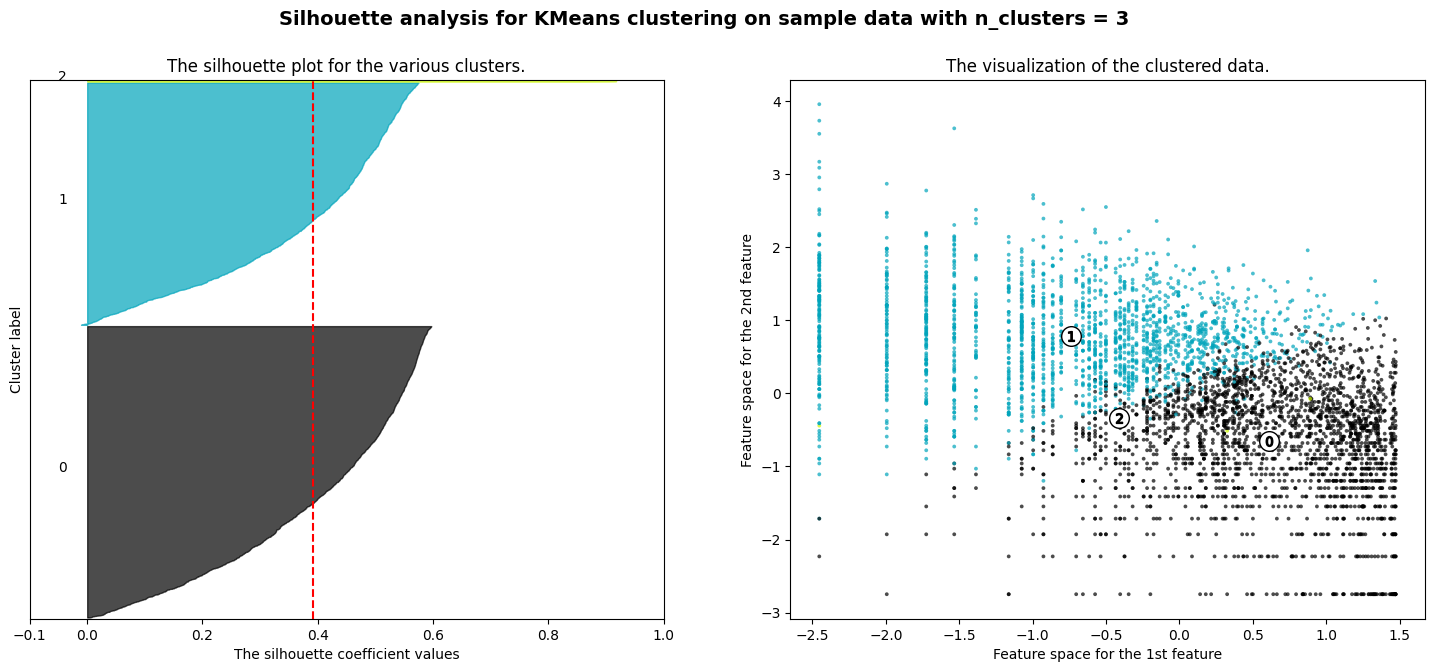

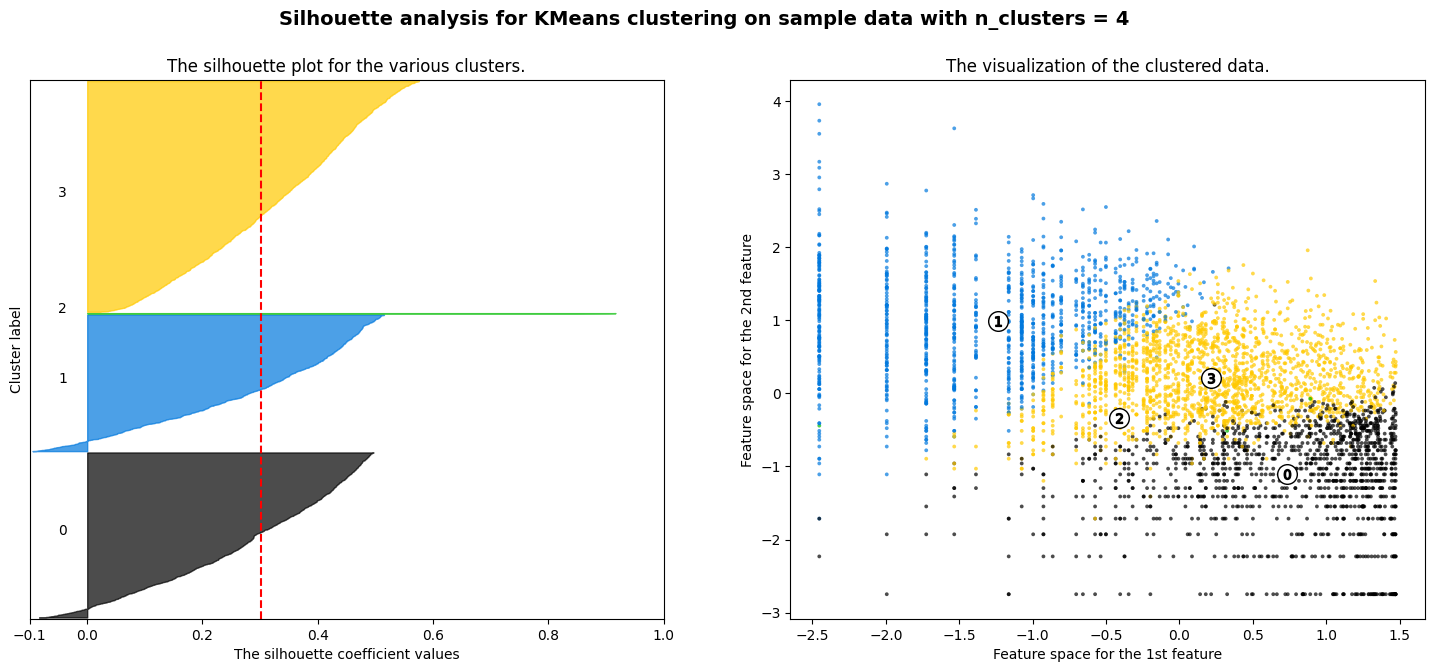

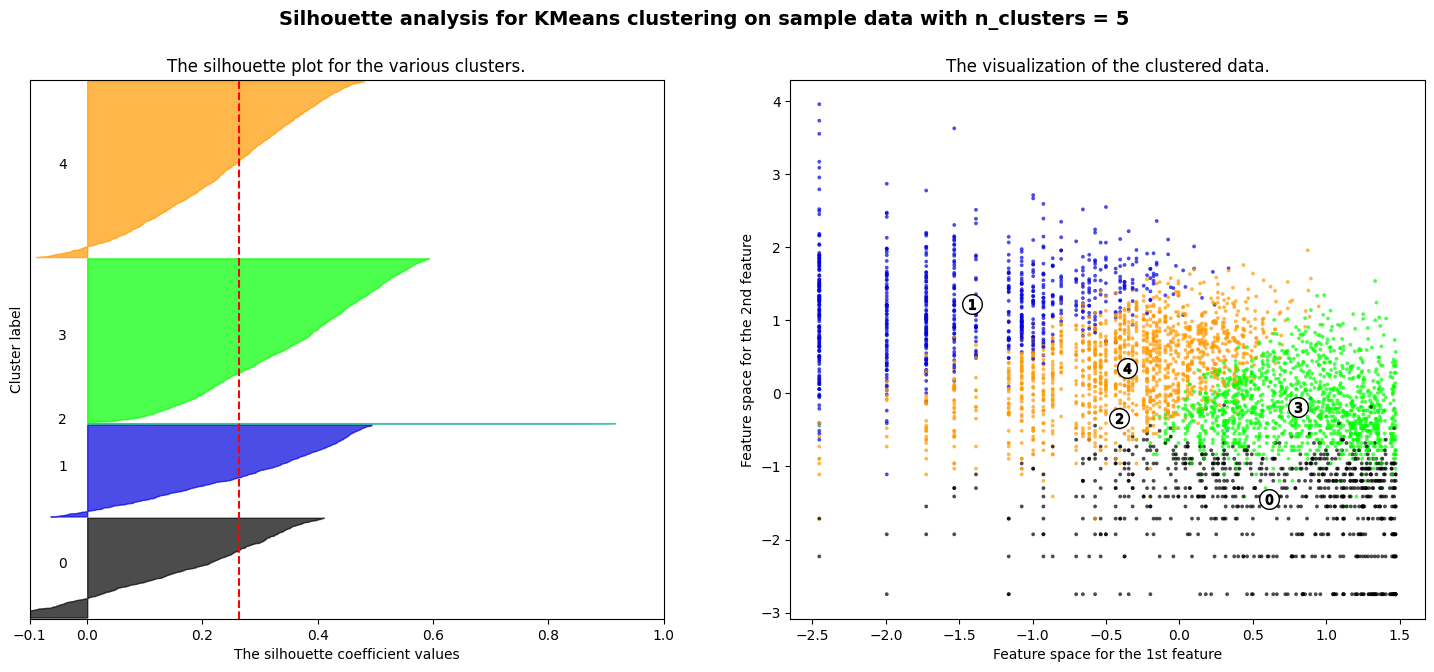

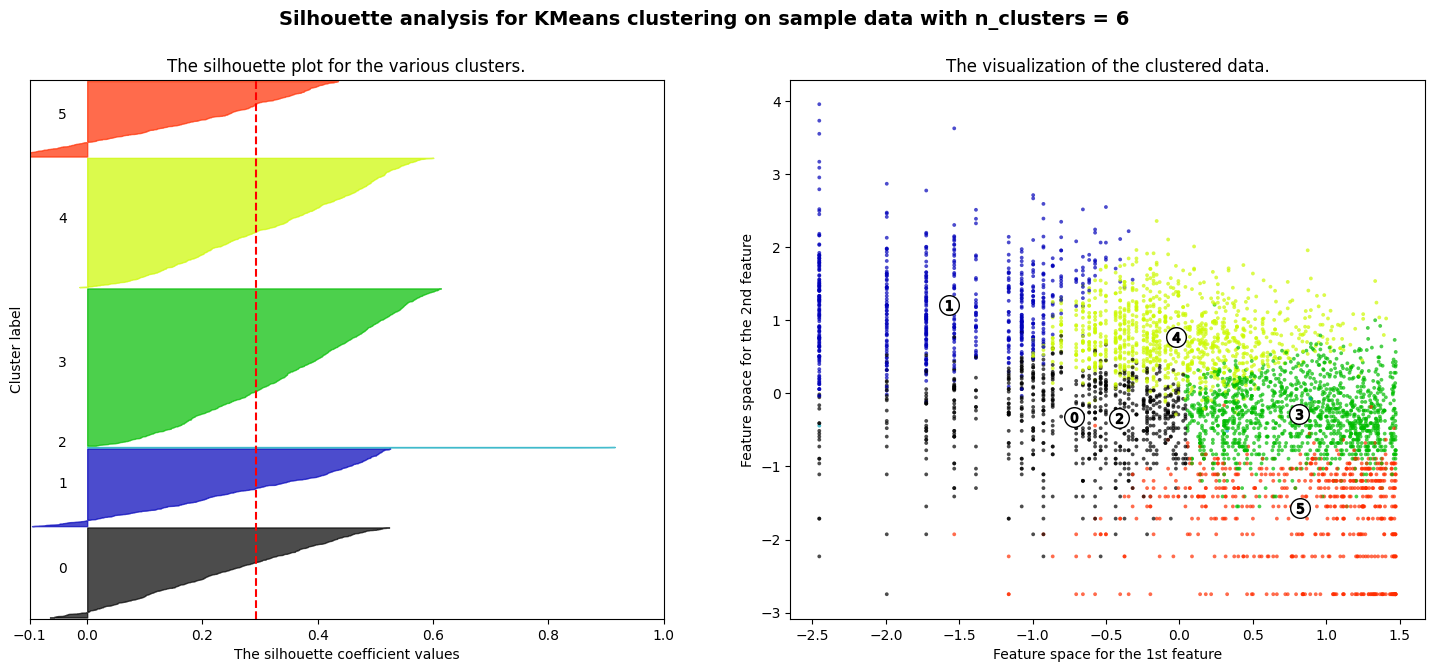

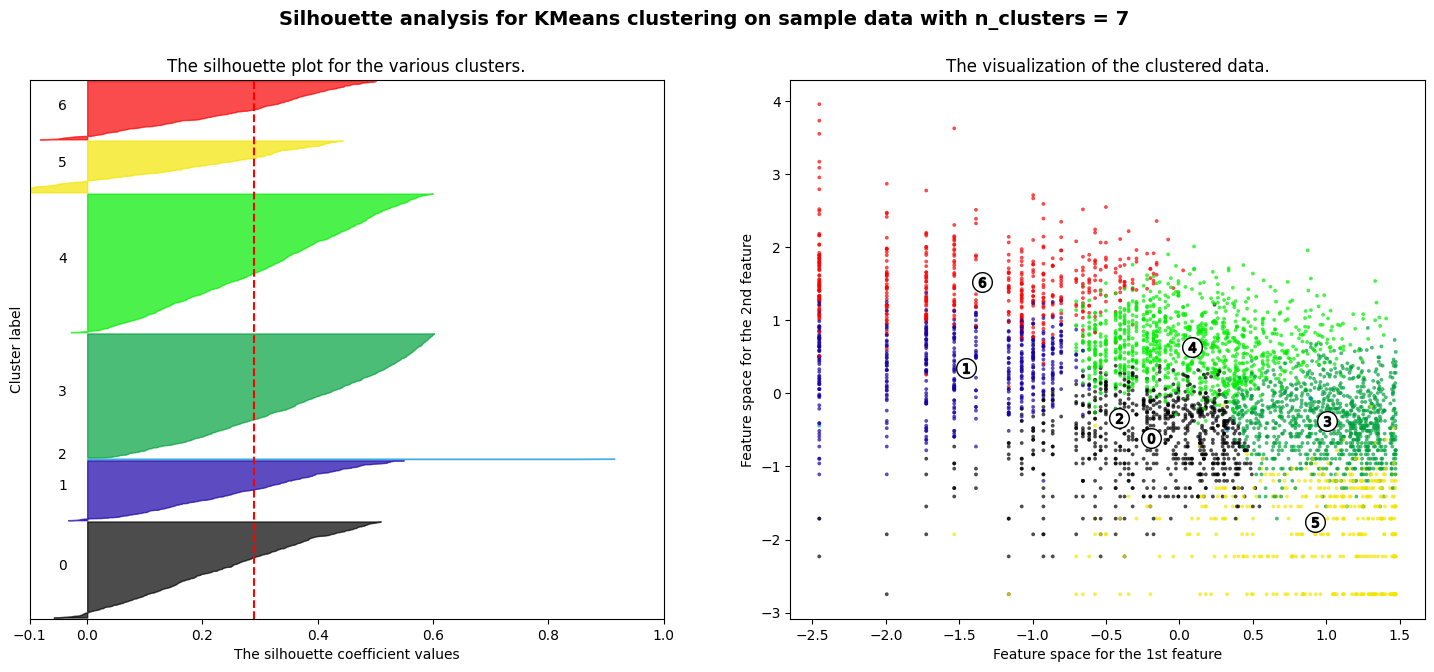

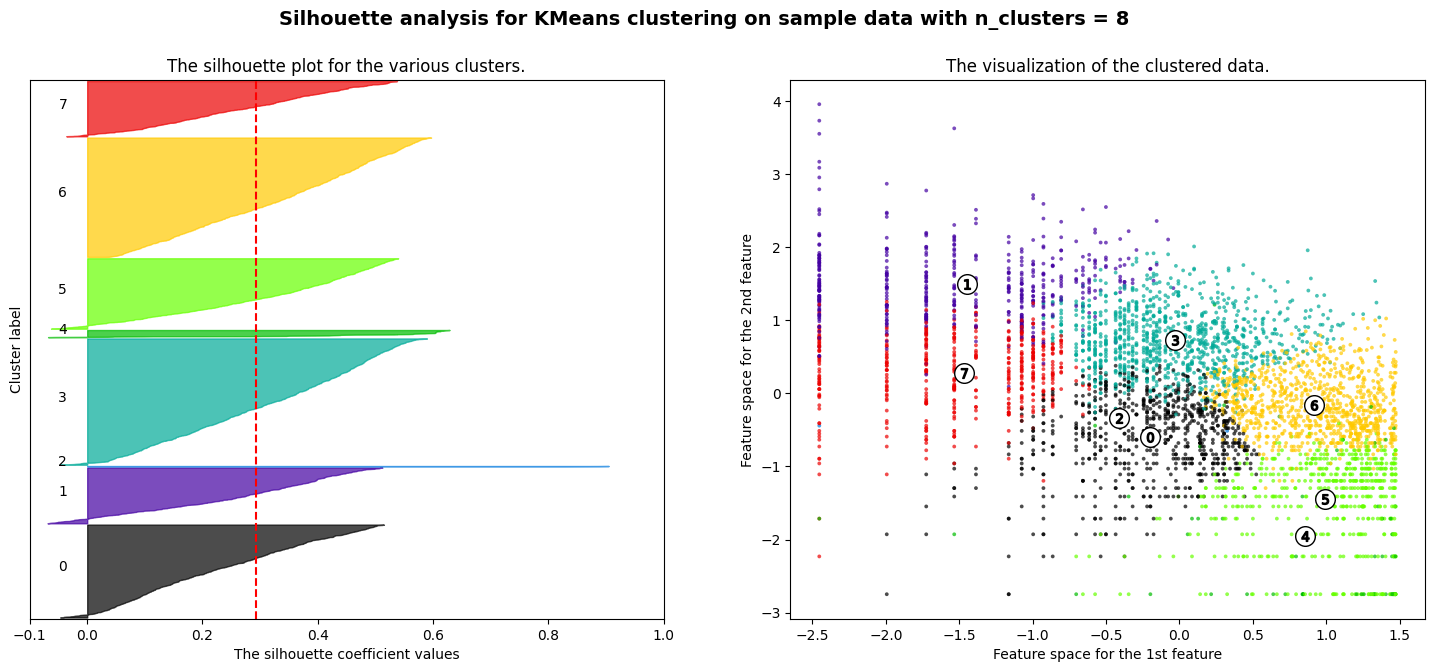

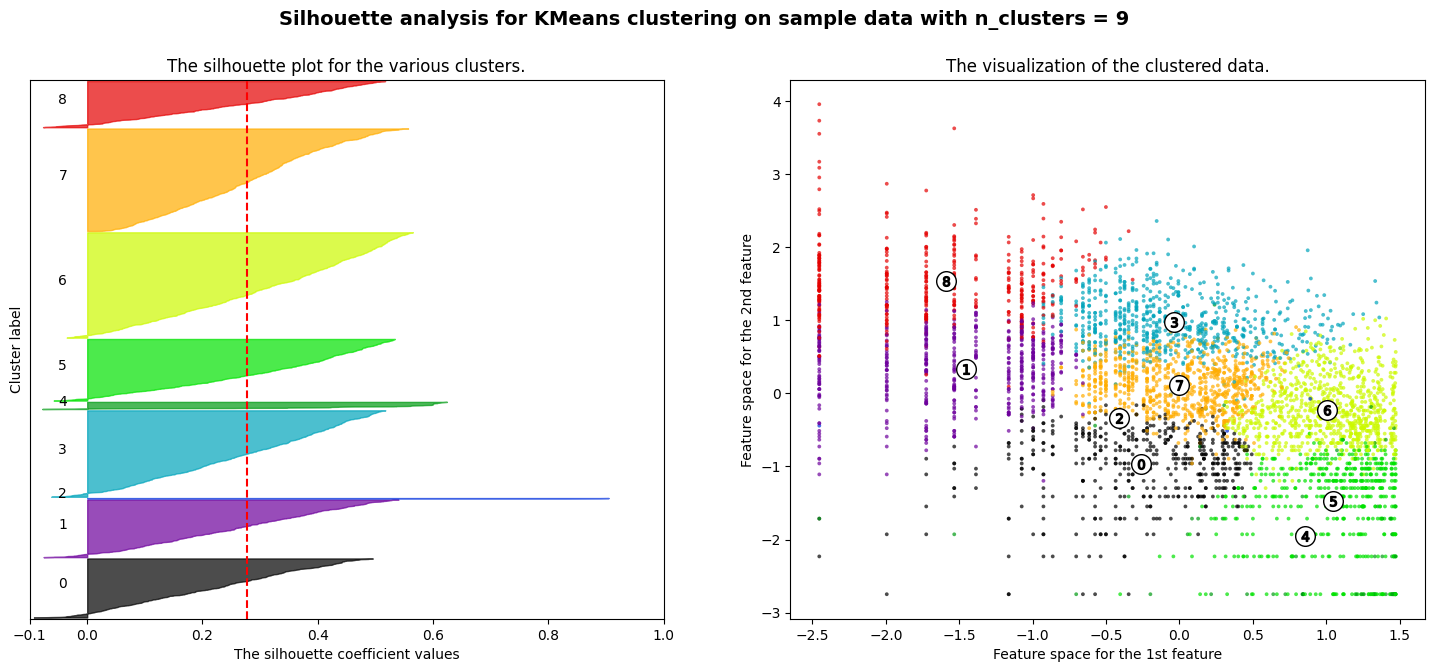

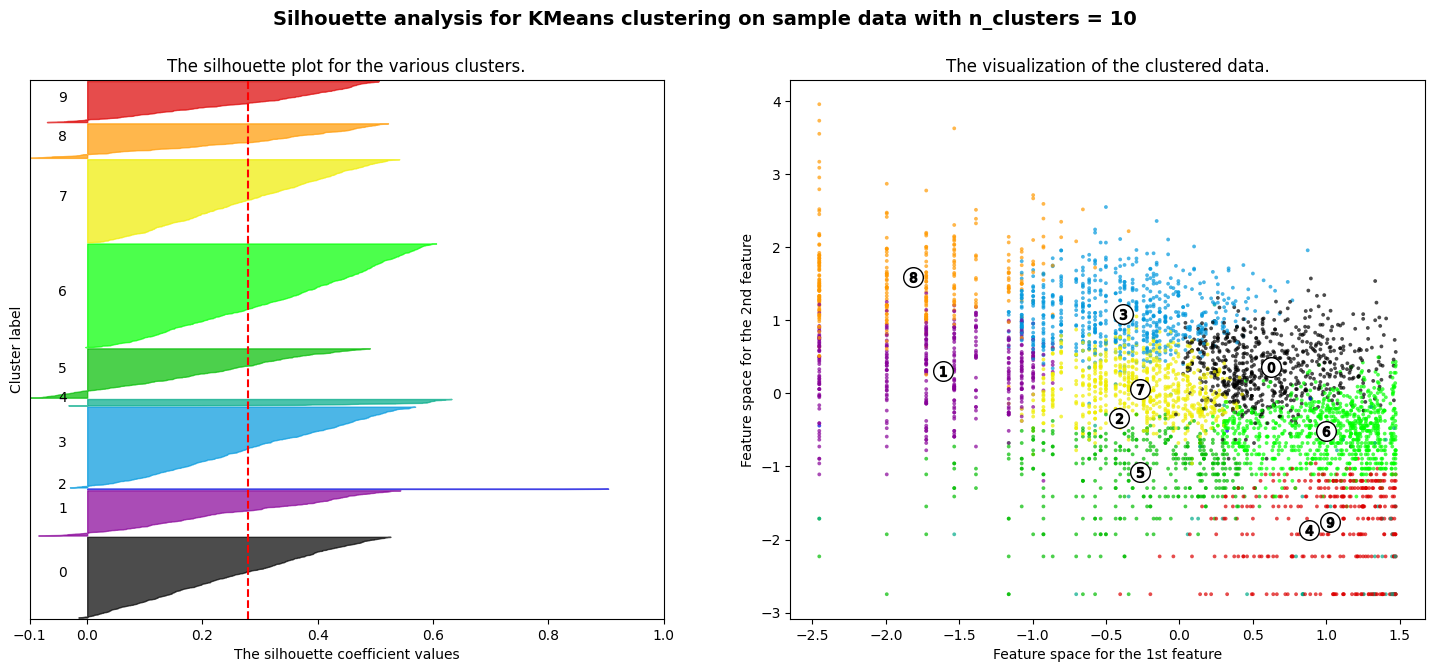

In [88]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [89]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

y_kmeans

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

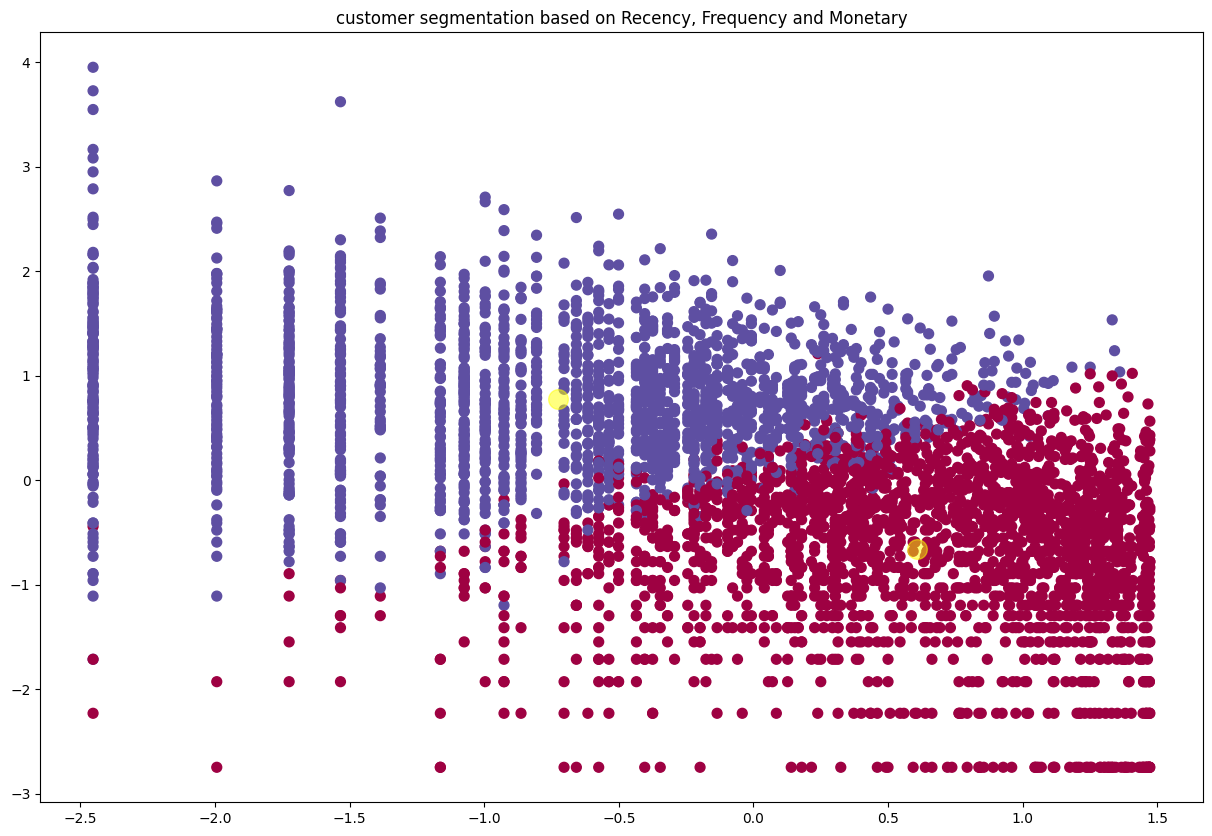

In [90]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

Customers are separated when we cluster them by Recency, Frequency and Monetary.


 Sum of distance squared: {1: 13116.000000000004} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684, 4: 5292.416872433366} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684, 4: 5292.416872433366, 5: 4103.293914838277} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684, 4: 5292.416872433366, 5: 4103.293914838277, 6: 3418.947197121865} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684, 4: 5292.416872433366, 5: 4103.293914838277, 6: 3418.947197121865, 7: 3043.588593209159} 


 Sum of distance squared: {1: 13116.000000000004, 2: 7716.124608223872, 3: 6217.200497021684, 4: 5292.416872433366, 5: 4103.293914838277, 6: 3418.947197121865, 7: 304

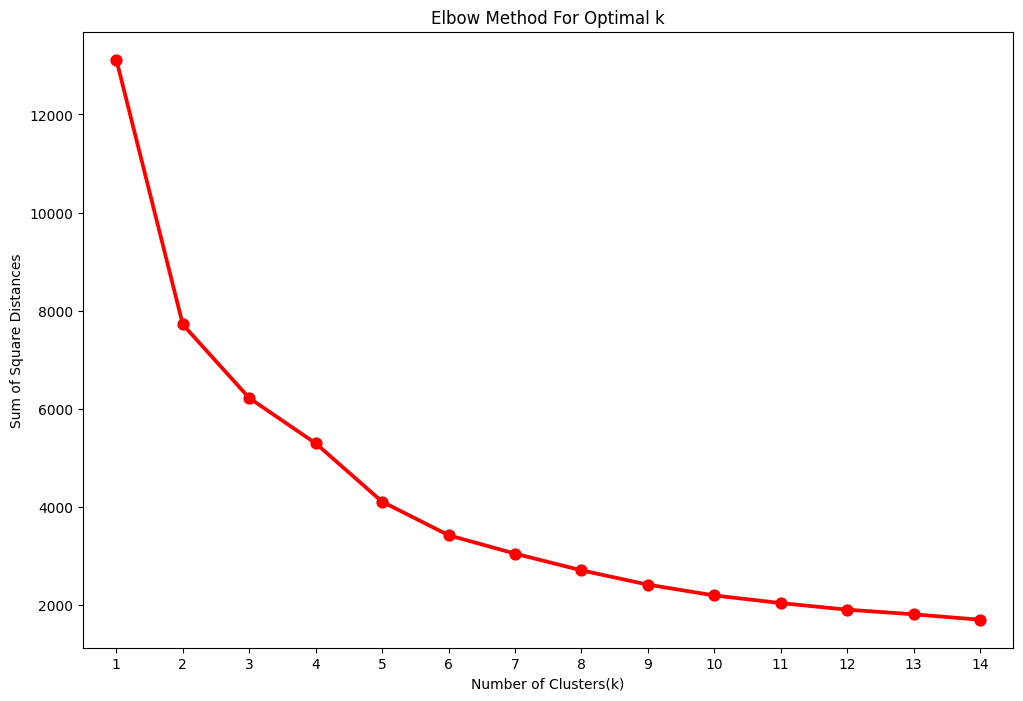

In [91]:
# @title Applying Elbow Method on Recency, Frequency and Monetary

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    print(f'\n Sum of distance squared: {sum_of_sq_dist} \n')

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

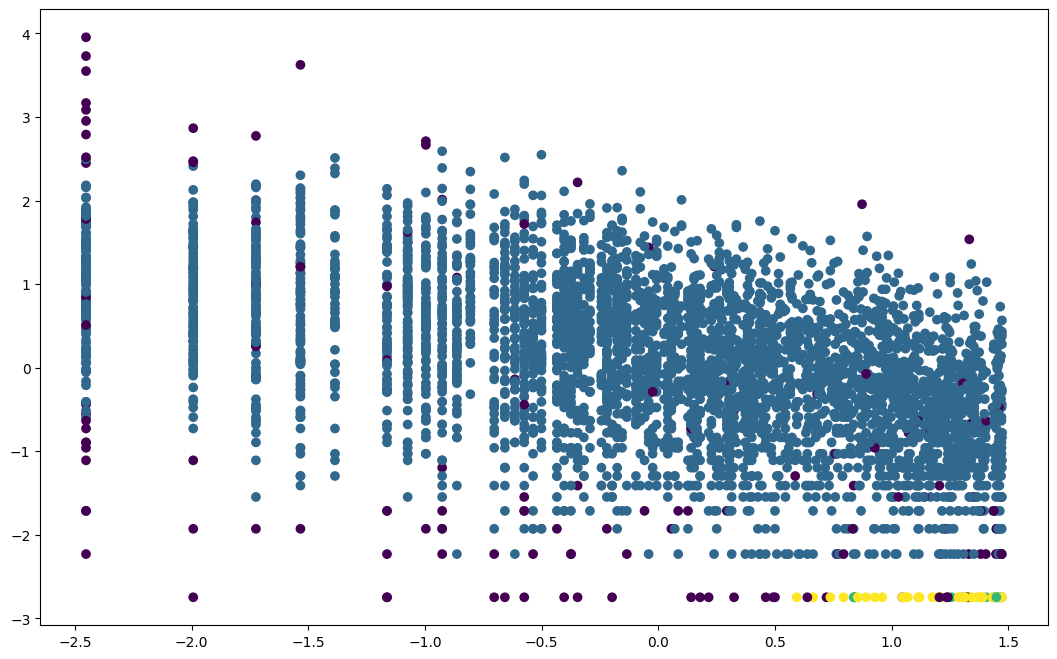

In [93]:
# @title Applying DBSCAN to Recency, Frequency and Monetary

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.

In [94]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          2      1.00  4  4  4      444        12   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         95   1545.41  2  2  2      222         6   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.693147      0.000000        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.553877      7.343045        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1

In [95]:
#checking customer belongs to cluster 1
rfm_df[rfm_df['Cluster'] ==1]

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12347.0           2        182   4310.00  1  1  1      111         3   
12349.0          18         73   1757.55  2  2  1      221         5   
12352.0          36         95   1545.41  2  2  2      222         6   
12356.0          22         59   2811.43  2  2  1      221         5   
12357.0          33        131   6207.67  2  1  1      211         4   
...             ...        ...       ... .. .. ..      ...       ...   
18260.0         172        140   2595.00  4  1  1      411         6   
18263.0          23         62   1211.08  2  2  2      222         6   
18272.0           2        170   3064.78  1  1  1      111         3   
18283.0           3        756   2094.88  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12347.0        0.693147       5.204007      8.368693        1  
12349.0        2.890372       4.290459      7.471676        1  
12352.0        3.583519       4.553877      7.343045        1  
12356.0        3.091042       4.077537      7.941449        1  
12357.0        3.496508       4.875197      8.733541        1  
...                 ...            ...           ...      ...  
18260.0        5.147494       4.941642      7.861342        1  
18263.0        3.135494       4.127134      7.099268        1  
18272.0        0.693147       5.135798      8.027731        1  
18283.0        1.098612       6.628041      7.647252        1  
18287.0        3.737670       4.248495      7.516041        1  

[2017 rows x 12 columns]

## Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.
Dendogram

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

Dendogram to find the optimal number of clusters

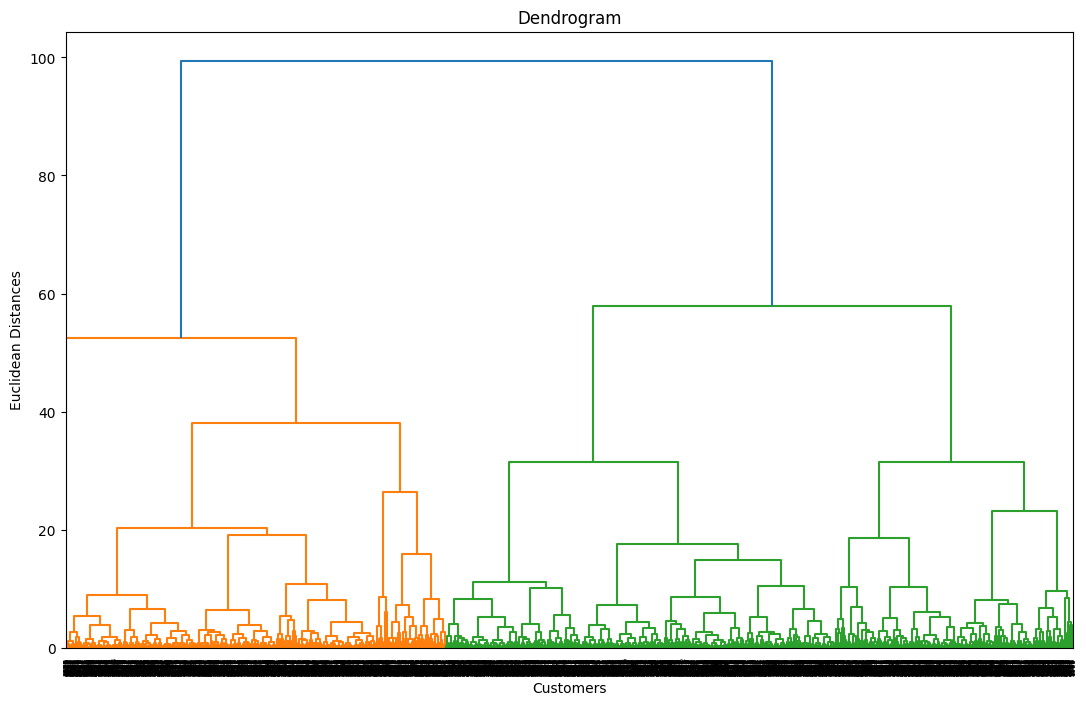

In [96]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

The plot clearly shows the number of clusters = 2.

In [98]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')   # affinity = 'euclidean' is not supported now.
y_hc = hc.fit_predict(X)

In [99]:
print(y_hc)

[1 0 0 ... 0 0 0]


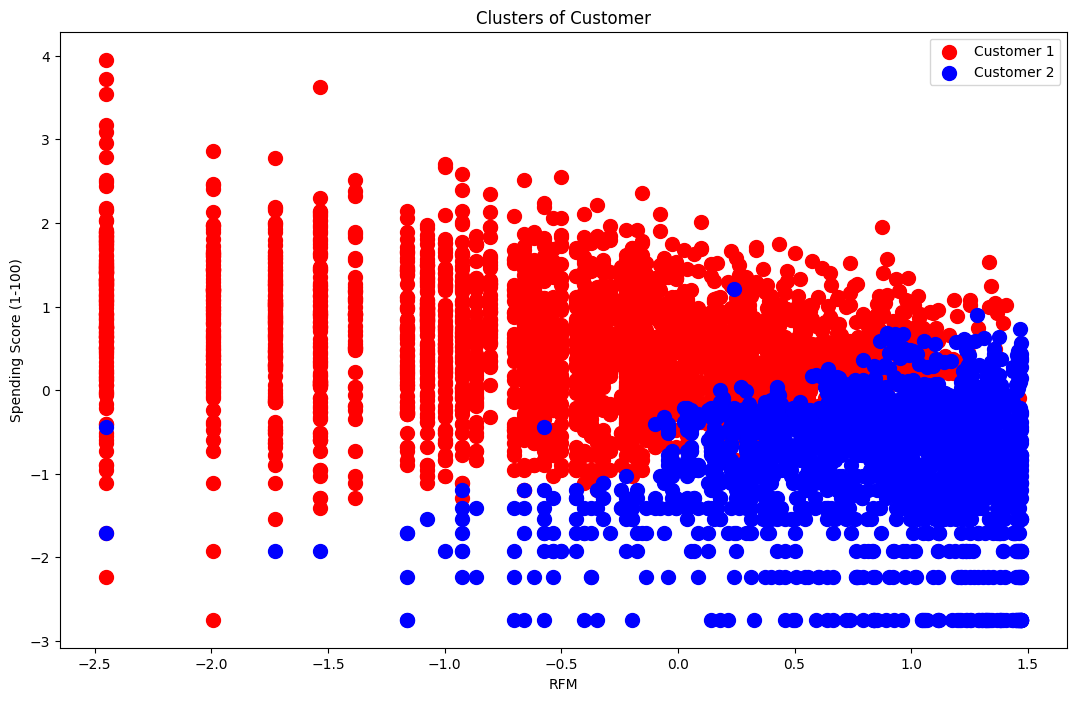

In [100]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [101]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

Recency   Frequency     Monetary
Cluster                                     
0        146.591507   24.353291   456.941109
1         27.371344  173.265741  3588.126248

From above table and plot, we can see that the customers belonging to `cluster 1` are premium customers. This means we can keep them in customer loyalty program. Customers belonging to `cluster 0` needs to be looked on. We can provide them with offers or create strategies for them so that they will do more business transactions with us.

# Summary

In [102]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

# Conclusion

- This analysis focuses on developing customer segments for a UK-based online store, selling unique all-occasion gifts.

- Using RFM analysis, the customers have been segmented into various clusters and got a silhouette score of 0.39 for two clusters.

- By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.

- The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.